# Volcanic Eruption Patterns in the Americas

## 1 Introduction

This Jupyter notebook does a comprehensive examination of volcanic eruption trends in Northern and Southern America. The notebook offers a thorough examination of volcanic eruption patterns, displaying the regional and chronological distributions and investigating several factors that impact volcanic activity in the Americas. Focusing on (Northern America: USA, Canada, Mexico and Southern America: Argentina, Chile, Chile-Argentina, Chile-Bolivia, Chile-Peru, Colombia, Colombia-Ecuador, Ecuador, Peru)

It includes:

- Maps of volcano locations in both regions.
- Pie charts showing the primary types of volcanoes by country.
- Bar charts illustrating eruption frequency by subregion.
- Scatter plots of elevation versus the last eruption year, with regression lines.
- Histograms of elevation distributions.
- Box plots of population proximity to volcanoes.
- Analysis of eruption data, including scatter plots of eruption timing, correlation analysis, and frequency by evidence method and temporal intervals.

The data used in this project was gathered from https://volcano.si.edu/. The Smithsonian Institution's Global Volcanism Program is a reliable source that offers extensive data on volcanoes and eruptions. 

## 2.0 Instructions

1 Assemble the Environment: Make sure that you have installed the necessary libraries, including Pandas, Matplotlib, Seaborn, and Basemap. At the start of the notebook, import these libraries.

2 Load Data: Load and clean the data from the provided CSV files for both Northern and Southern America.

3 Generate Visualizations: Use the provided functions and methods to generate maps, pie charts, bar charts, scatter plots, and histograms.

4 Analyze Eruption Data: Load eruption data, clean it, and generate the necessary visualizations to analyze eruption timing, frequency, and correlation

## 2.1 Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import numpy as np
from volcano_analysis import load_and_clean_data, plot_volcano_map, plot_pie_chart_for_country, plot_bar_chart
from volcano_analysis_class import VolcanoAnalysis

In [2]:
# Print the current working directory to verify the environment setup
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/joncalzada/Desktop/UCSD/SIO113/CalzadaElorriaga_J_FinalProject


## 2.2 Load North America Data

### 2.2.1 North America - Volcanoes

In [3]:
# Path to the CSV file
volcano_list_csv_path_NA = '/Users/joncalzada/Desktop/UCSD/SIO113/CalzadaElorriaga_J_FinalProject/GVP_Volcano_List_Northern_America.csv'

# Reading the CSV file into a DataFrame
volcano_list_NA_df = pd.read_csv(volcano_list_csv_path_NA, header=1)

# Drop rows with NaN values to clean the data
volcano_list_NA_cleaned = volcano_list_NA_df.dropna()

# Preview the cleaned data
print(volcano_list_NA_cleaned.head())

   Volcano Number Volcano Name Primary Volcano Type Last Eruption Year  \
0          321040        Adams        Stratovolcano                950   
1          284160      Agrigan        Stratovolcano               1917   
2          284141         Ahyi        Stratovolcano               2024   
3          311320       Akutan        Stratovolcano               1992   
4          284180     Alamagan        Stratovolcano                870   

         Country                   Region                          Subregion  \
0  United States   Canada and Western USA                   USA (Washington)   
1  United States  Japan, Taiwan, Marianas  Izu, Volcano, and Mariana Islands   
2  United States  Japan, Taiwan, Marianas  Izu, Volcano, and Mariana Islands   
3  United States                   Alaska                   Aleutian Islands   
4  United States  Japan, Taiwan, Marianas  Izu, Volcano, and Mariana Islands   

   Latitude  Longitude  Elevation  ... Major Rock 5             Minor Rock

### 2.2.2 North America - Eruptions

In [4]:
# Path to the CSV file
eruption_results_csv_path_NA = '/Users/joncalzada/Desktop/UCSD/SIO113/CalzadaElorriaga_J_FinalProject/GVP_Eruption_Results_Northern_America.csv'

# Reading the CSV file into a DataFrame
eruption_results_NA_df = pd.read_csv(eruption_results_csv_path_NA, header=1)

# Preview the data
print(eruption_results_NA_df.head())

   Volcano Number           Volcano Name  Eruption Number   Eruption Category  \
0          311160  Atka Volcanic Complex            22564  Confirmed Eruption   
1          284141                   Ahyi            22557  Confirmed Eruption   
2          311110                 Kanaga            22558  Confirmed Eruption   
3          284202                   Ruby            22547  Confirmed Eruption   
4          311360             Shishaldin            22539  Confirmed Eruption   

  Area of Activity  VEI VEI Modifier Start Year Modifier  Start Year  \
0              NaN  NaN          NaN                 NaN        2024   
1              NaN  NaN          NaN                 NaN        2024   
2              NaN  NaN          NaN                 NaN        2023   
3              NaN  NaN          NaN                 NaN        2023   
4              NaN  NaN          NaN                 NaN        2023   

   Start Year Uncertainty  ...          Evidence Method (dating)  \
0           

## 2.3 Load South America Data

### 2.3.1 South America - Volcanoes

In [5]:
# Path to the CSV file
volcano_list_csv_path_SA = '/Users/joncalzada/Desktop/UCSD/SIO113/CalzadaElorriaga_J_FinalProject/GVP_Volcano_List_Southern_America.csv'

# Reading the CSV file into a DataFrame
volcano_list_SA_df = pd.read_csv(volcano_list_csv_path_SA, header=1)

# Drop rows with NaN values to clean the data
volcano_list_SA_cleaned = volcano_list_SA_df.dropna()

# Preview the cleaned data
print(volcano_list_SA_cleaned.head())

    Volcano Number       Volcano Name Primary Volcano Type Last Eruption Year  \
1           355096         Acamarachi        Stratovolcano            Unknown   
14          358062           Aguilera        Stratovolcano              -1253   
17          353040             Alcedo               Shield               1993   
19          352031              Aliso        Stratovolcano              -2450   
30          354004  Andahua-Orcopampa       Volcanic field               1490   

    Country         Region                              Subregion  Latitude  \
1     Chile  South America  Northern Chile, Bolivia and Argentina   -23.292   
14    Chile  South America           Southern Chile and Argentina   -50.330   
17  Ecuador  South America                      Galapagos Islands    -0.430   
19  Ecuador  South America                                Ecuador    -0.530   
30     Peru  South America                                   Peru   -15.420   

    Longitude  Elevation  ... Major Ro

### 2.3.2 South Amrica - Eruptions

In [6]:
# Path to the CSV file
eruption_results_csv_path_SA = '/Users/joncalzada/Desktop/UCSD/SIO113/CalzadaElorriaga_J_FinalProject/GVP_Eruption_Results_Southern_America.csv'

# Reading the CSV file into a DataFrame
eruption_results_SA_df = pd.read_csv(eruption_results_csv_path_SA, header=1)

# Preview the data
print(eruption_results_SA_df.head())

   Volcano Number Volcano Name  Eruption Number   Eruption Category  \
0          353010   Fernandina            22560  Confirmed Eruption   
1          351060       Purace            22552  Confirmed Eruption   
2          354020       Ubinas            22542  Confirmed Eruption   
3          355100       Lascar            22493  Confirmed Eruption   
4          352050     Cotopaxi            22486  Confirmed Eruption   

  Area of Activity  VEI VEI Modifier Start Year Modifier  Start Year  \
0         SE flank  1.0          NaN                 NaN        2024   
1              NaN  NaN          NaN                 NaN        2023   
2              NaN  NaN          NaN                 NaN        2023   
3              NaN  3.0          NaN                 NaN        2022   
4    Summit crater  2.0          NaN                 NaN        2022   

   Start Year Uncertainty  ...          Evidence Method (dating)  \
0                     NaN  ...  Observations: Satellite (visual)   
1   

## 3 Data Visualization and Analysis - Volcanoes

In this section, we will explore the geographical and categorical distribution of volcanoes in North and South America through various visualizations. We will create maps to show the locations of volcanoes, pie charts to display the primary types of volcanoes by country, bar charts to illustrate eruption frequency by subregion, scatter plots of elevation versus the last eruption year, histograms of elevation distributions, and box plots of population proximity to volcanoes.

The visualizations and analysis aim to provide insights into:
- The spatial distribution of volcanoes in different regions.
- The predominant types of volcanoes in various countries.
- The frequency and timing of volcanic eruptions.
- The relationship between volcano elevation and eruption history.
- Population density near volcanic sites, indicating potential hazards.

### 3.1 Volcano Locations

#### 3.1.1 North America

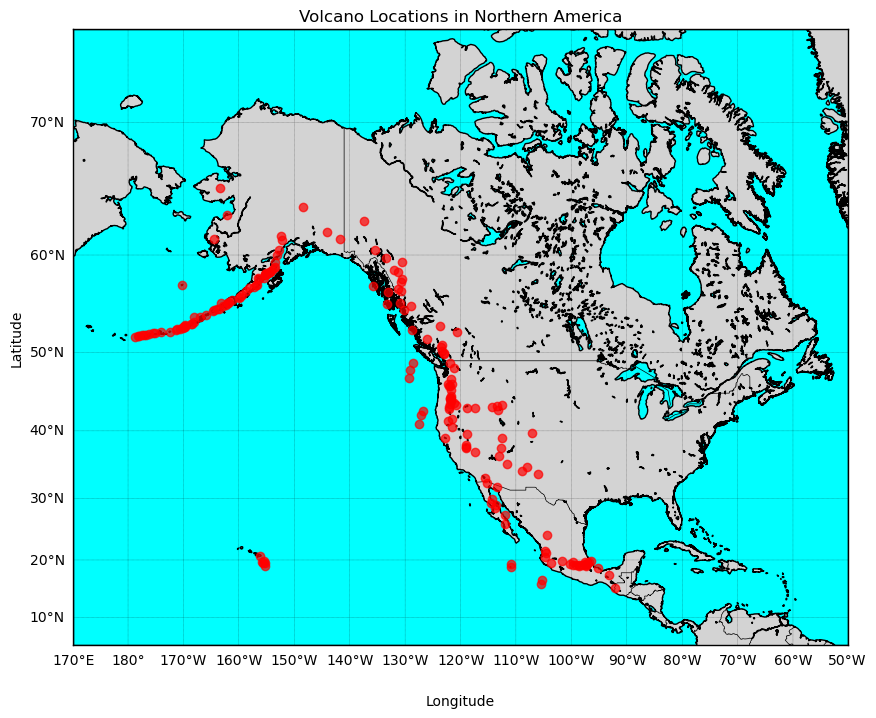

In [7]:
# Load and clean the data using a custom function
volcano_list_NA_cleaned = load_and_clean_data(volcano_list_csv_path_NA, header=1)

# Plot the map of volcano locations in North America using a custom plotting function
plot_volcano_map(volcano_list_NA_cleaned, 'Volcano Locations in Northern America')

This map shows the distribution of volcanoes in Northern America. The red dots represent the locations of the volcanoes.

#### 3.1.2 South America

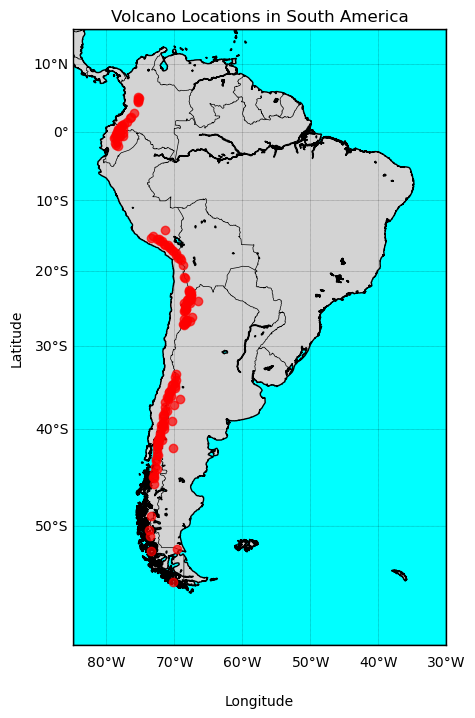

In [8]:
# Create the map
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Plot the volcano locations
x, y = m(volcano_list_SA_cleaned['Longitude'].values, volcano_list_SA_cleaned['Latitude'].values)
m.scatter(x, y, marker='o', color='red', zorder=5, alpha=0.7)

# Draw meridians and parallels
m.drawmeridians(range(-180, 180, 10), labels=[1, 0, 0, 1], linewidth=0.2)
m.drawparallels(range(-90, 90, 10), labels=[1, 0, 0, 1], linewidth=0.2)

plt.xlabel('Longitude', labelpad=35)  
plt.ylabel('Latitude', labelpad=35) 
plt.title('Volcano Locations in South America')
plt.show()

This map shows the distribution of volcanoes in Southern America. The red dots represent the locations of the volcanoes.

### 3.2 Eruption Frequency

#### 3.2.1 North America

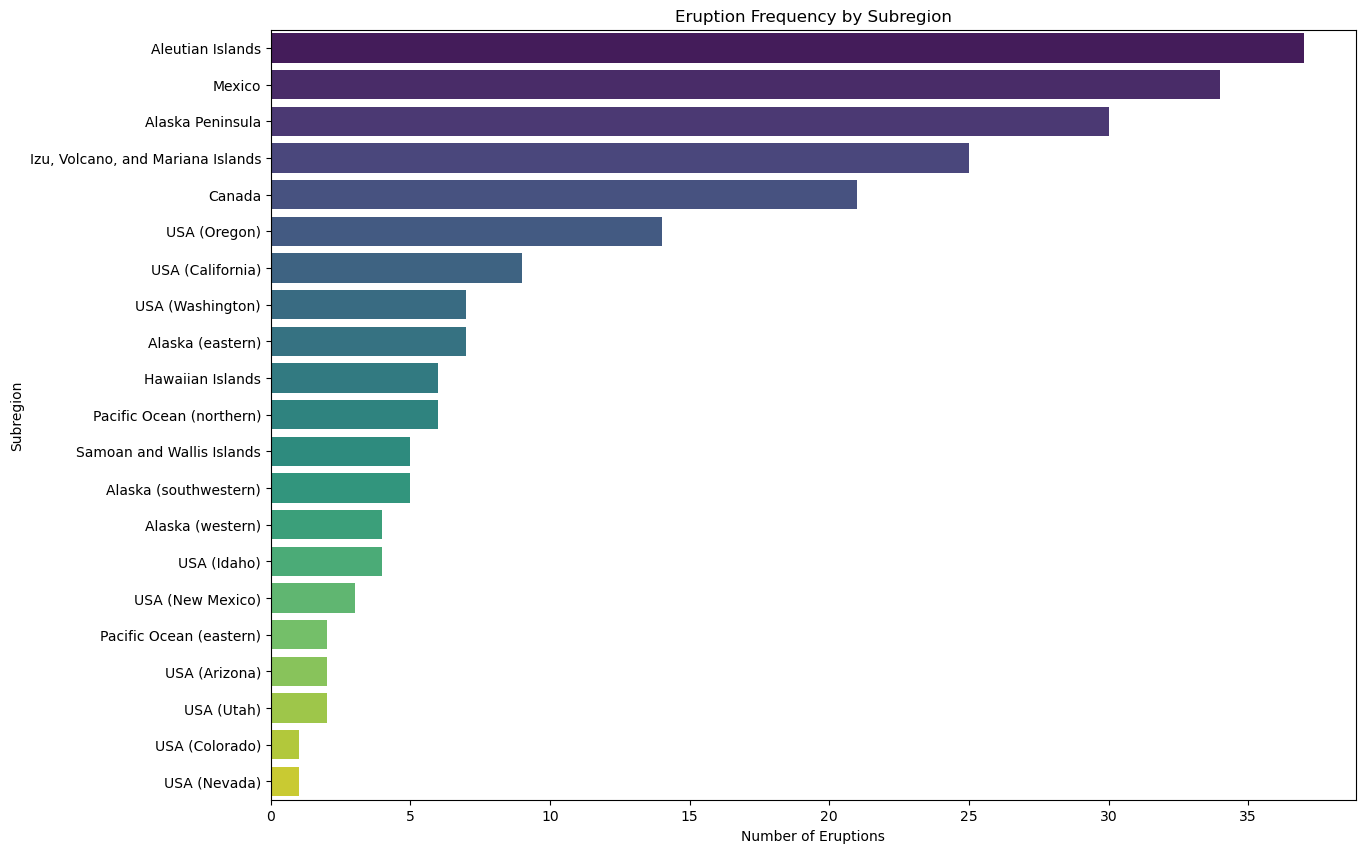

In [9]:
# Load and clean the data
volcano_list_NA_cleaned = load_and_clean_data(volcano_list_csv_path_NA, header=1)

# Convert 'Last Eruption Year' to numeric, forcing non-numeric values to NaN
volcano_list_NA_cleaned['Last Eruption Year'] = pd.to_numeric(volcano_list_NA_cleaned['Last Eruption Year'], errors='coerce')

# Plot the eruption frequency by subregion
plot_bar_chart(volcano_list_NA_cleaned, x_col='Last Eruption Year', y_col='Subregion', title='Eruption Frequency by Subregion', xlabel='Number of Eruptions', ylabel='Subregion')

This bar chart illustrates the frequency of volcanic eruptions in different subregions of Northern America. The Cascade Range shows a high frequency of eruptions.

#### 3.2.2 South America

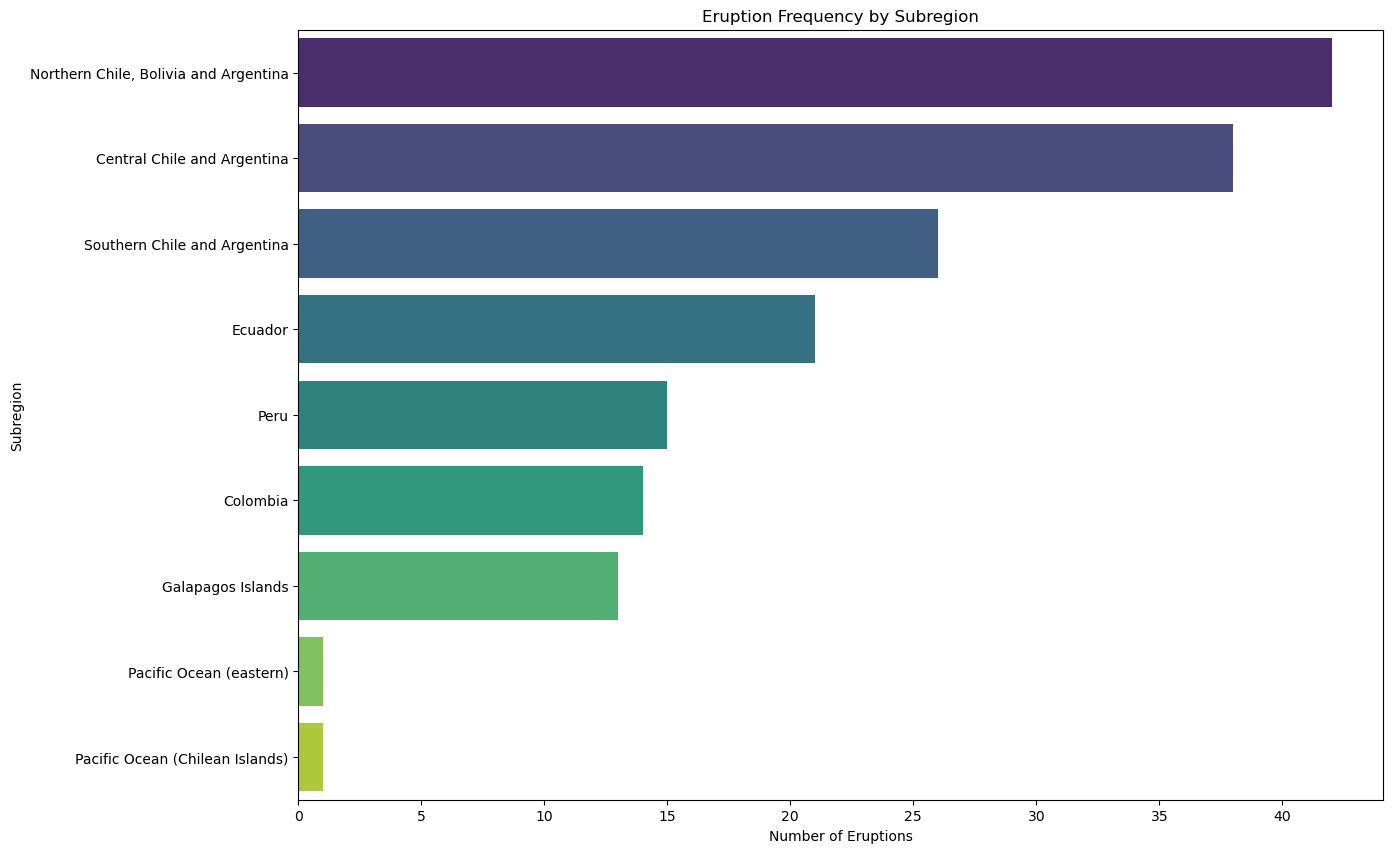

In [10]:
# Load and clean the data
volcano_list_SA_cleaned = load_and_clean_data(volcano_list_csv_path_SA, header=1)

# Convert 'Last Eruption Year' to numeric, forcing non-numeric values to NaN
volcano_list_SA_cleaned['Last Eruption Year'] = pd.to_numeric(volcano_list_SA_cleaned['Last Eruption Year'], errors='coerce')

# Plot the eruption frequency by subregion
plot_bar_chart(volcano_list_SA_cleaned, x_col='Last Eruption Year', y_col='Subregion', title='Eruption Frequency by Subregion', xlabel='Number of Eruptions', ylabel='Subregion')

This bar chart illustrates the frequency of volcanic eruptions in different subregions of Southern America. The Andes region shows a high frequency of eruptions.

### 3.3 Primary Volcano Types by Country

#### 3.3.1 North America

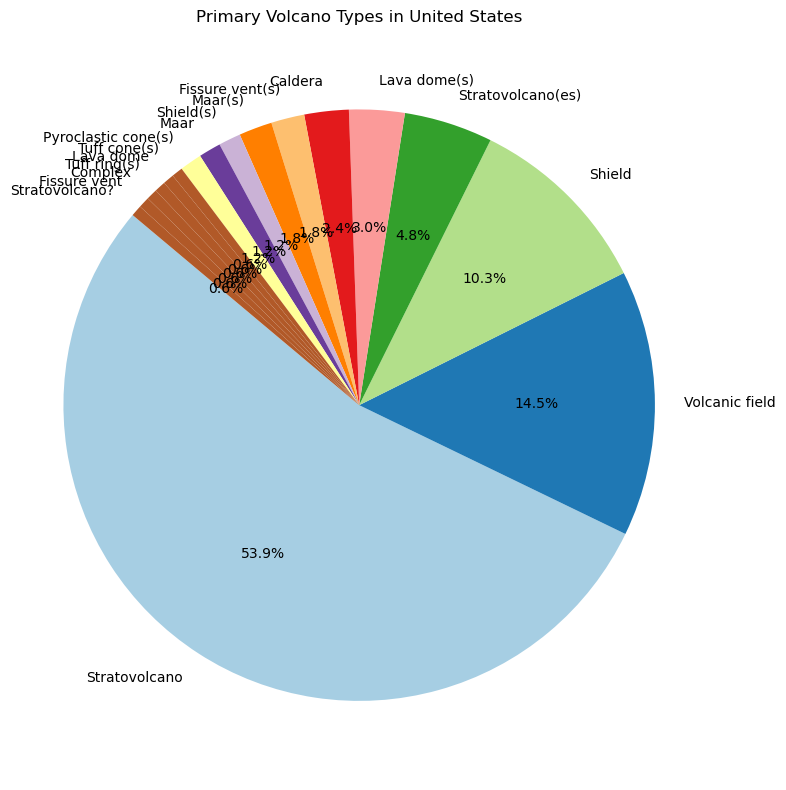

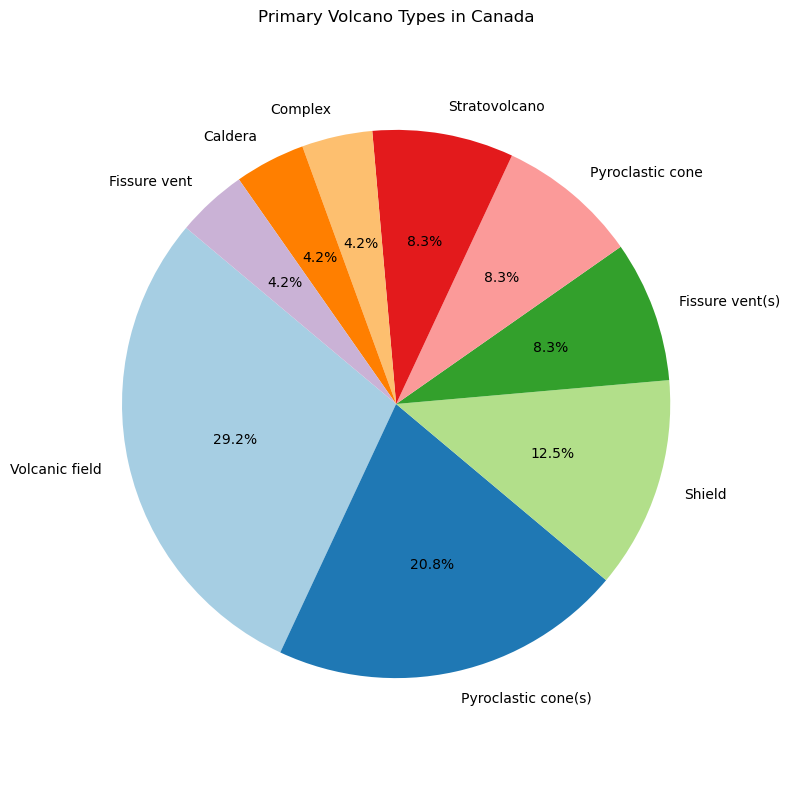

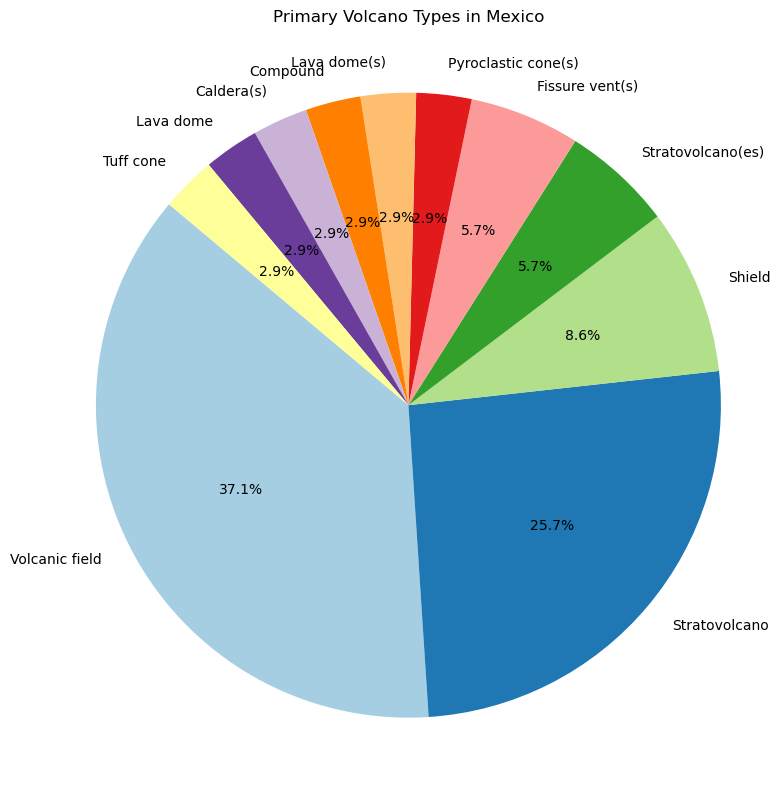

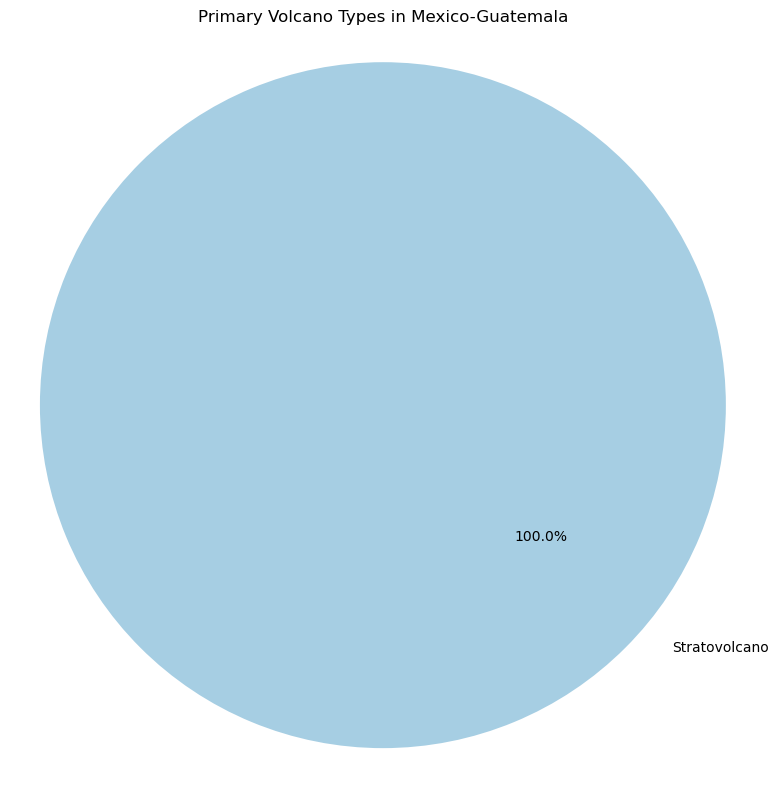

In [11]:
# Using the class in the notebook
volcano_analysis = VolcanoAnalysis('/Users/joncalzada/Desktop/UCSD/SIO113/CalzadaElorriaga_J_FinalProject/GVP_Volcano_List_Northern_America.csv')

# Plot the pie charts of primary volcano types by country using the class method
volcano_analysis.plot_volcano_types_by_country()

These pie charts display the distribution of primary volcano types for each country in Northern America. They provide a visual representation of the proportion of different types of volcanoes, such as stratovolcanoes, shield volcanoes, and calderas, within each country.

#### 3.3.2 South America

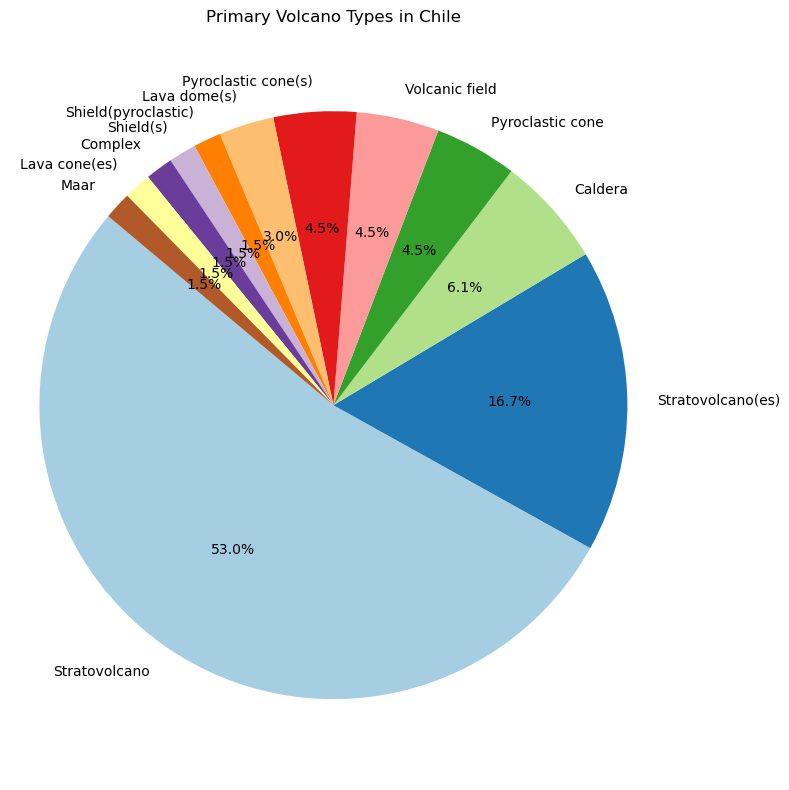

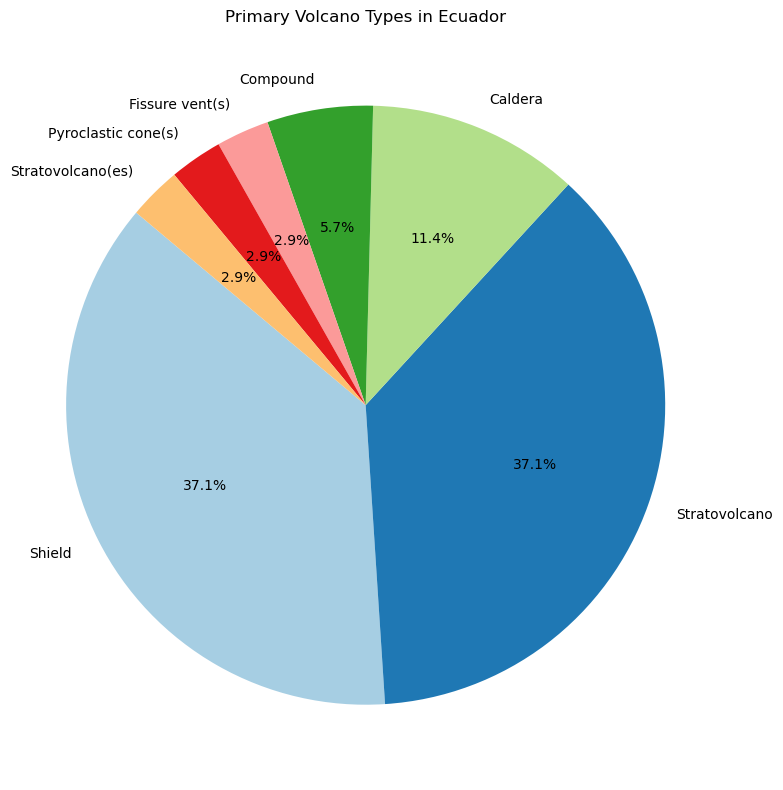

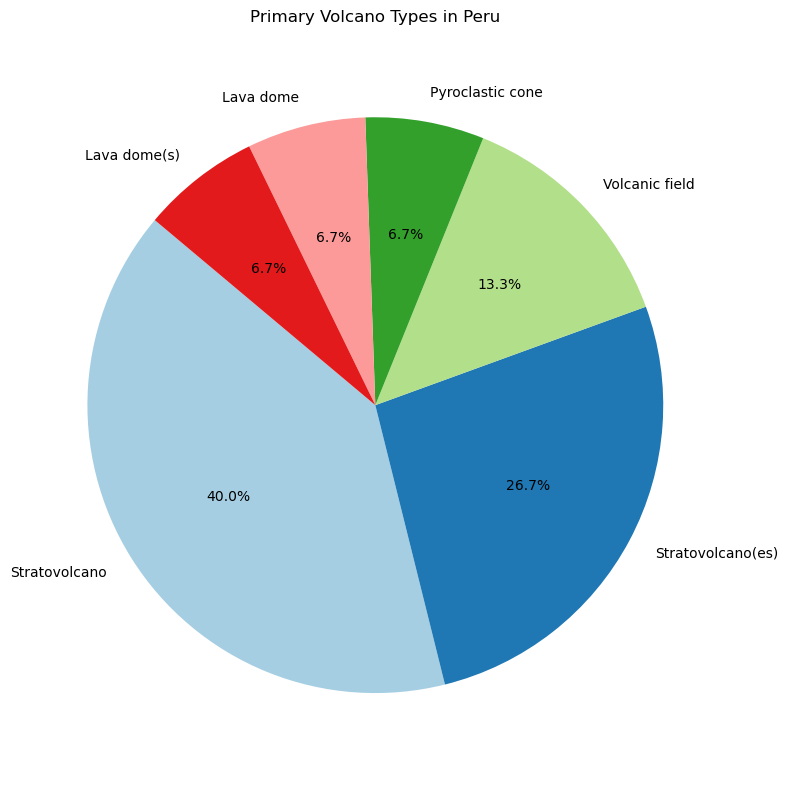

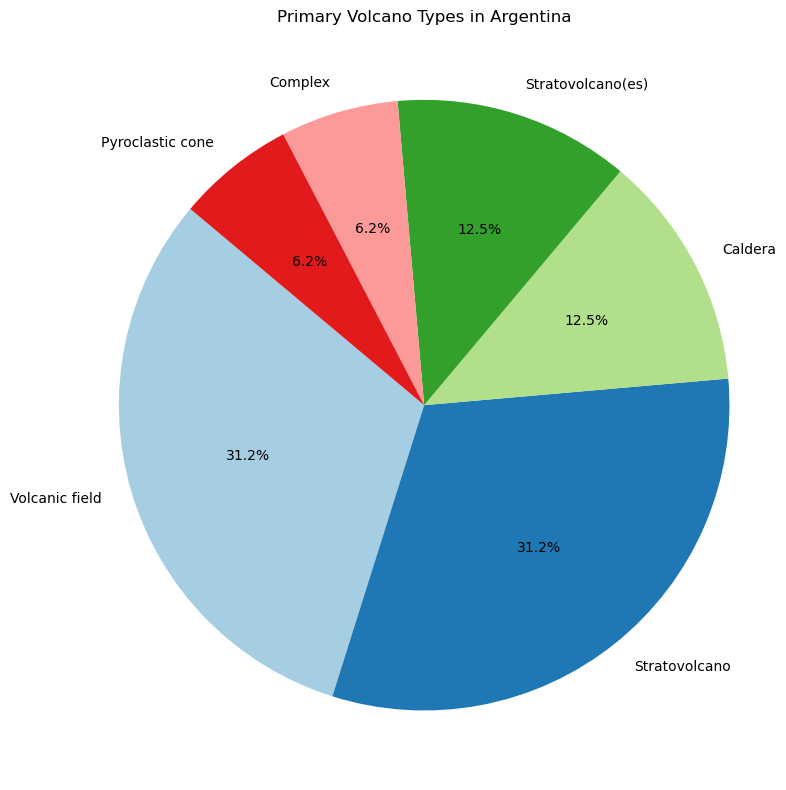

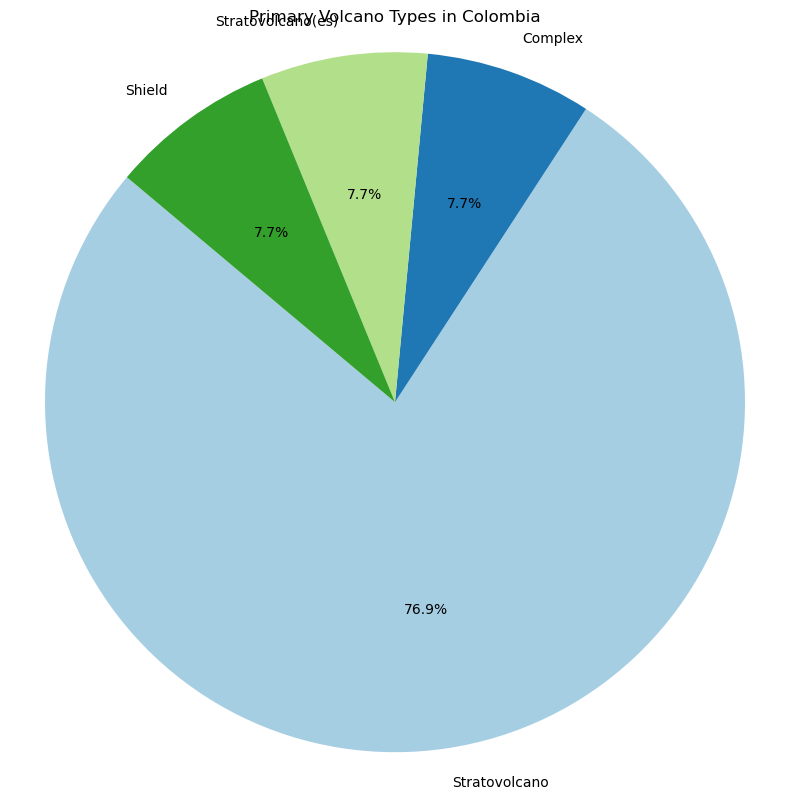

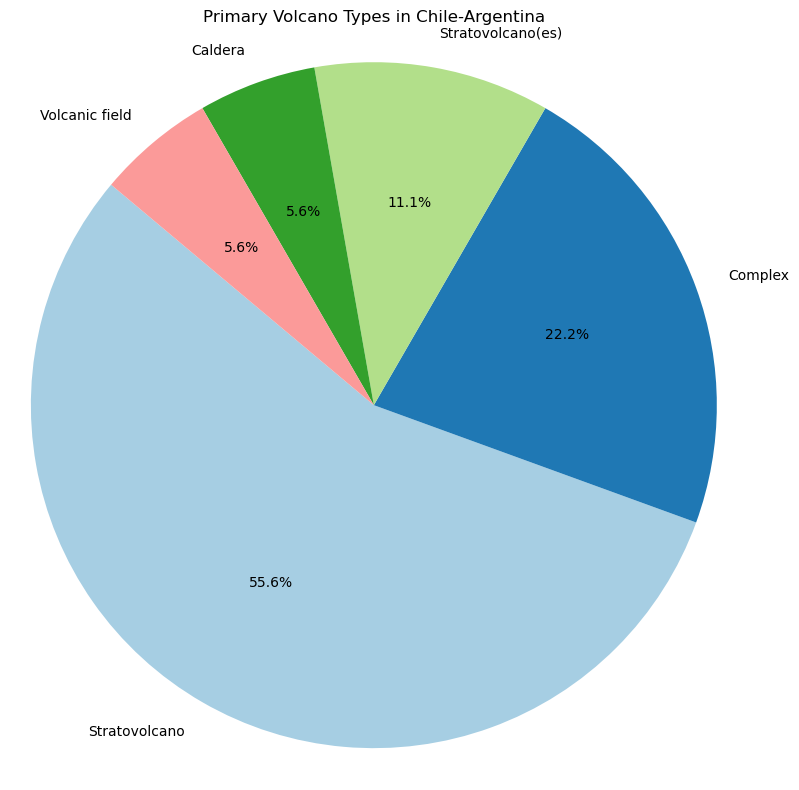

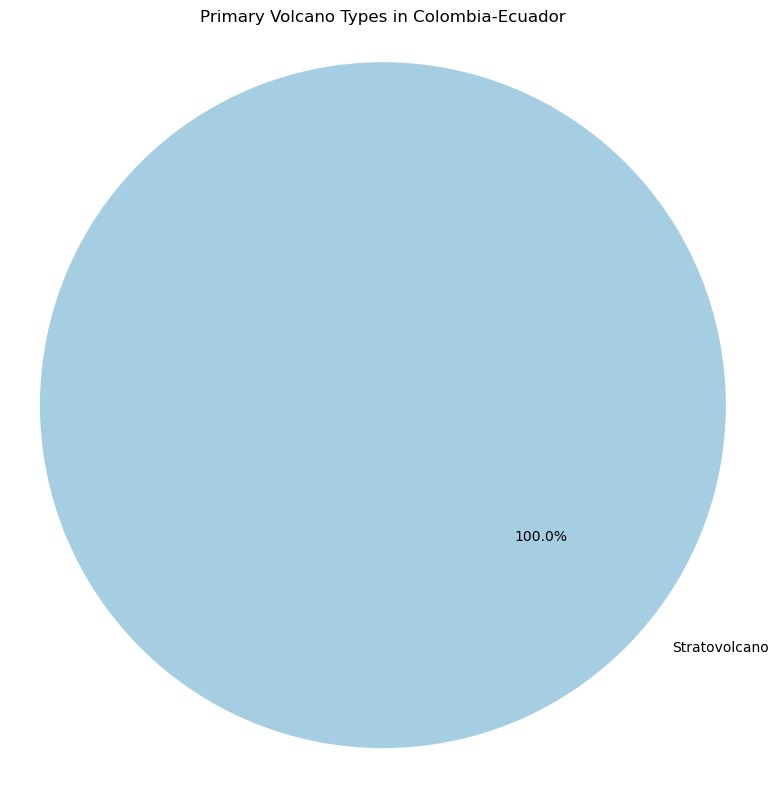

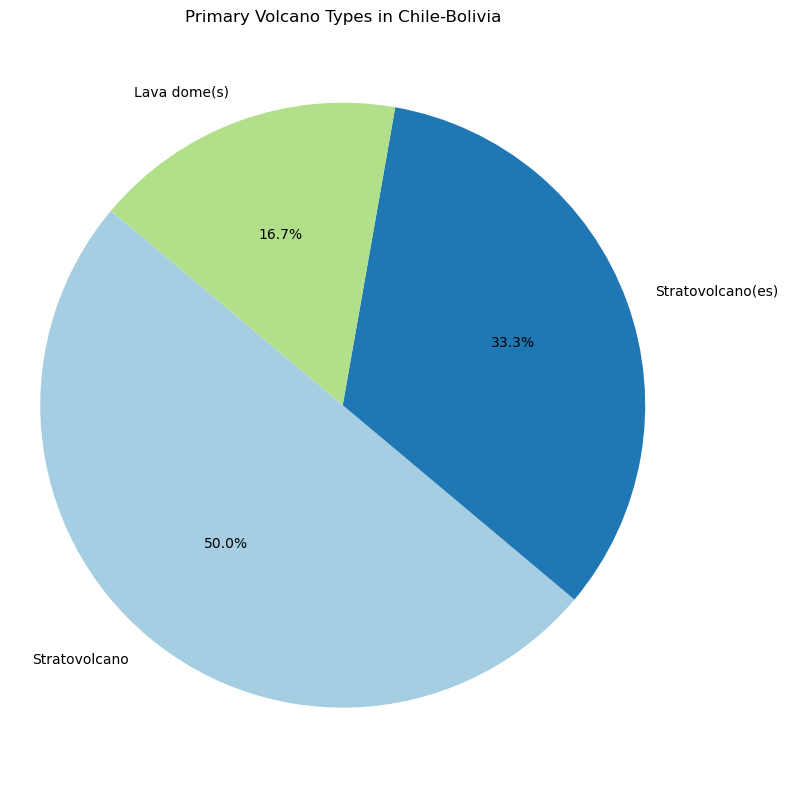

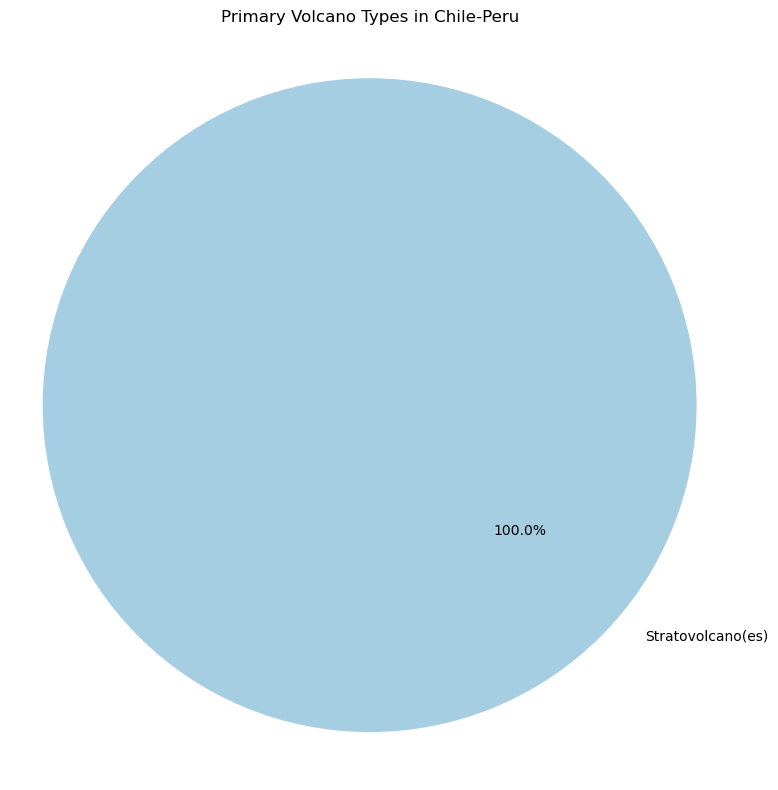

In [12]:
# Using the class in the notebook
volcano_analysis = VolcanoAnalysis('/Users/joncalzada/Desktop/UCSD/SIO113/CalzadaElorriaga_J_FinalProject/GVP_Volcano_List_Southern_America.csv')

# Plot the pie charts of primary volcano types by country using the class method
volcano_analysis.plot_volcano_types_by_country()

These pie charts display the distribution of primary volcano types for each country in Southern America. They provide a visual representation of the proportion of different types of volcanoes, such as stratovolcanoes, shield volcanoes, and calderas, within each country.

### 3.4 Elevation vs Eruption Year

#### 3.4.1 North America

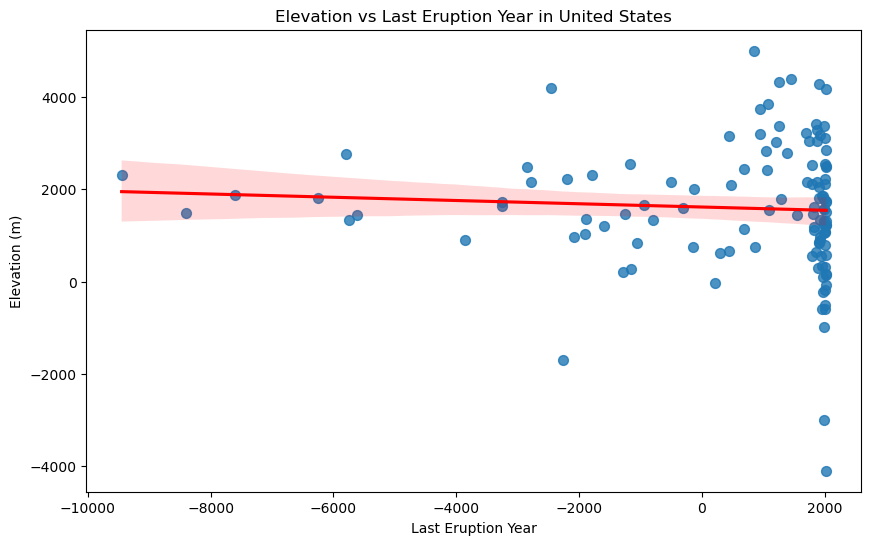

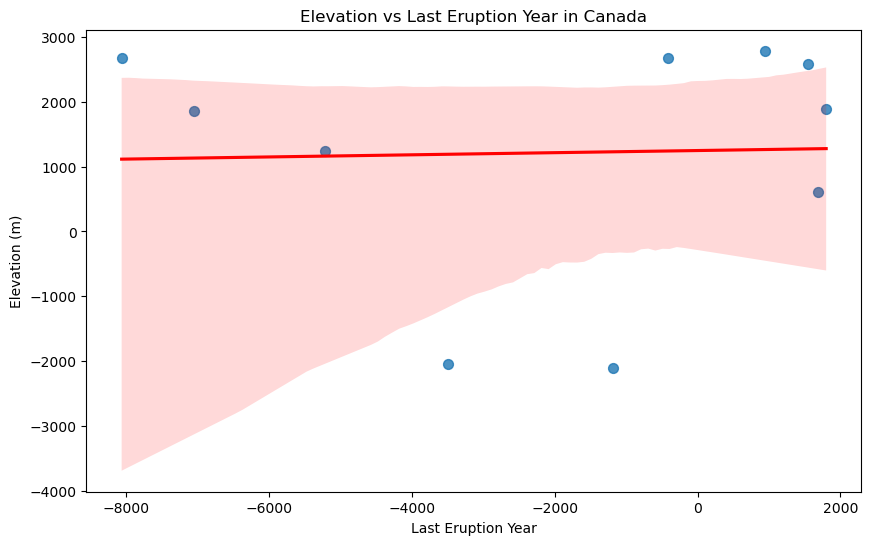

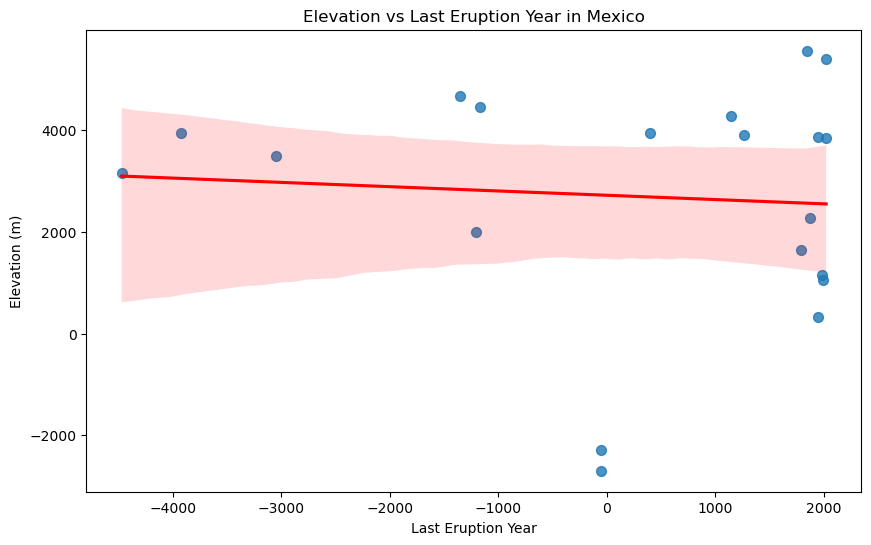

In [13]:
# Convert 'Last Eruption Year' to numeric, coerce errors to NaN, and drop resulting NaNs
volcano_list_NA_cleaned['Last Eruption Year'] = pd.to_numeric(volcano_list_NA_cleaned['Last Eruption Year'], errors='coerce')

# List of countries to plot
countries = volcano_list_NA_cleaned['Country'].unique()

# Plot elevation versus last eruption year for each country with a regression line
for country in countries:
    country_data = volcano_list_NA_cleaned[volcano_list_NA_cleaned['Country'] == country]
    if len(country_data) > 1: 
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Last Eruption Year', y='Elevation', data=country_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
        plt.title(f'Elevation vs Last Eruption Year in {country}')
        plt.xlabel('Last Eruption Year')
        plt.ylabel('Elevation (m)')
        plt.show()

This scatter plot shows the relationship between the elevation of volcanoes and their last eruption year in Northern America. The regression line indicates a slight correlation between higher elevations and more recent eruptions.

#### 3.5.1 South America

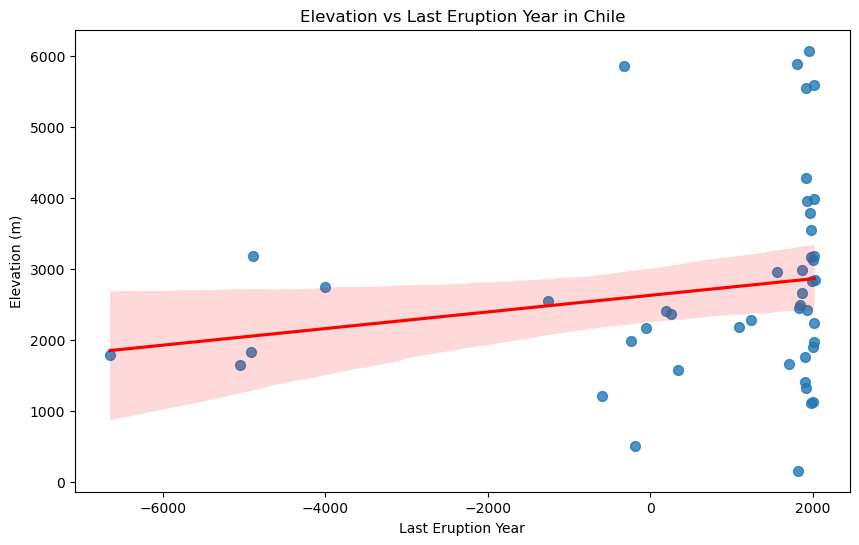

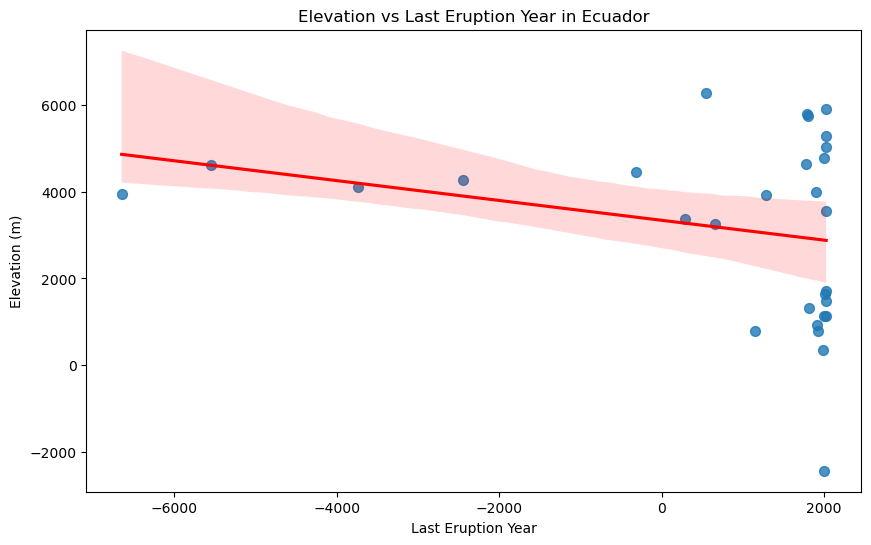

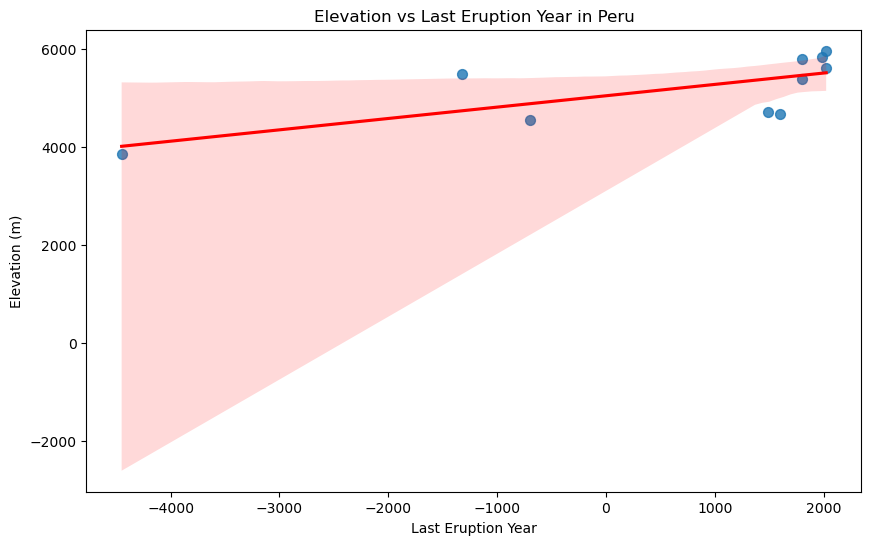

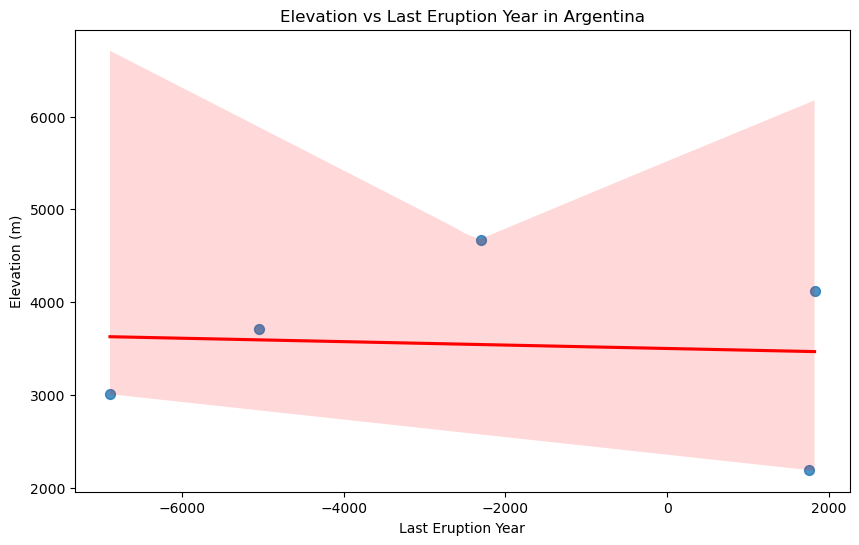

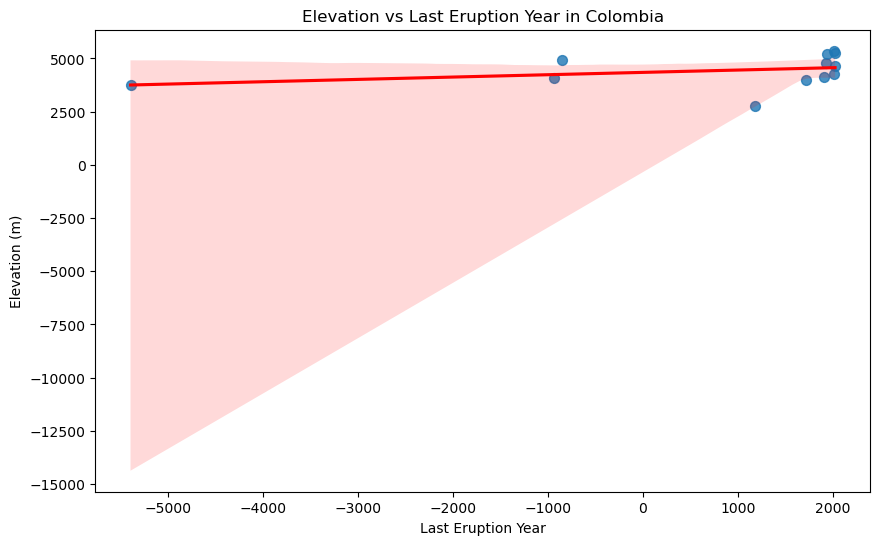

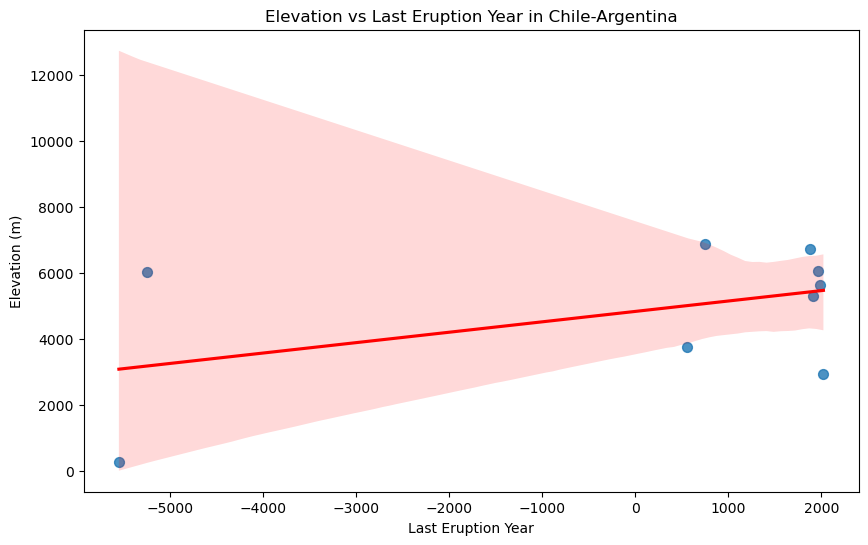

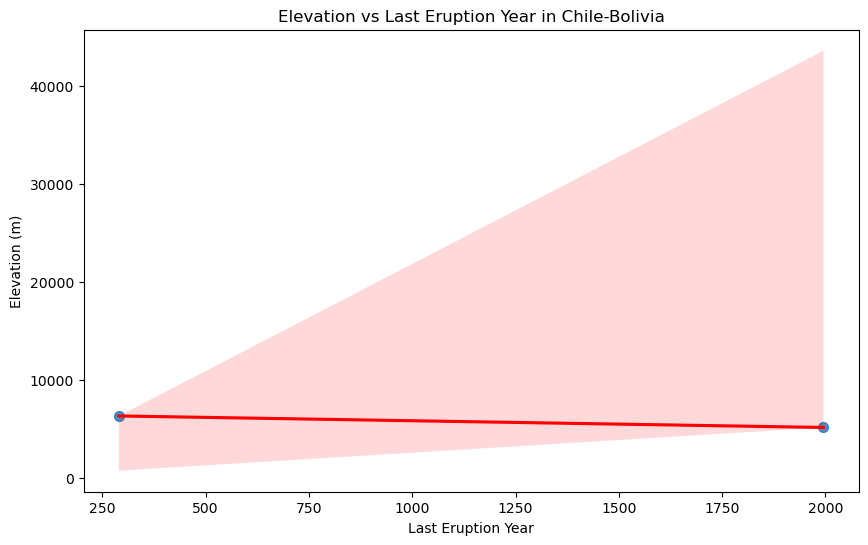

In [14]:
# Convert 'Last Eruption Year' to numeric, coerce errors to NaN, and drop resulting NaNs
volcano_list_SA_cleaned['Last Eruption Year'] = pd.to_numeric(volcano_list_SA_cleaned['Last Eruption Year'], errors='coerce')

# List of countries to plot
countries = volcano_list_SA_cleaned['Country'].unique()

# Plot elevation versus last eruption year for each country with a regression line
for country in countries:
    country_data = volcano_list_SA_cleaned[volcano_list_SA_cleaned['Country'] == country]
    if len(country_data) > 1:  
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Last Eruption Year', y='Elevation', data=country_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
        plt.title(f'Elevation vs Last Eruption Year in {country}')
        plt.xlabel('Last Eruption Year')
        plt.ylabel('Elevation (m)')
        plt.show()

This scatter plot shows the relationship between the elevation of volcanoes and their last eruption year in Southern America. The regression line indicates a slight correlation between higher elevations and more recent eruptions.

### 3.6 Number of Volcanoes by Tectonic Settings

#### 3.6.1 North America

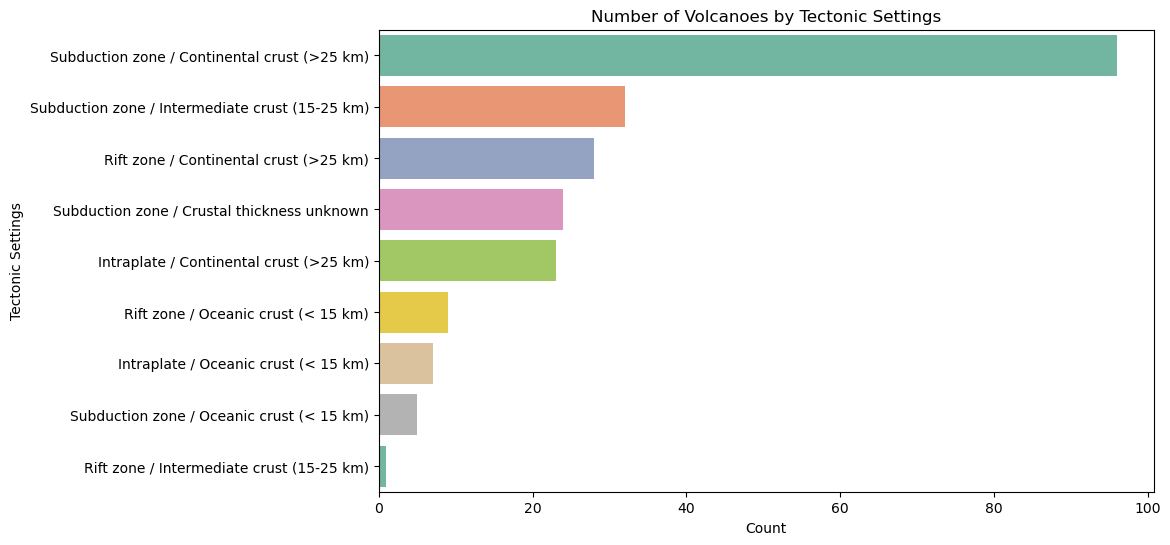

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Tectonic Settings', data=volcano_list_NA_cleaned, palette='Set2', order=volcano_list_NA_cleaned['Tectonic Settings'].value_counts().index)
plt.title('Number of Volcanoes by Tectonic Settings')
plt.xlabel('Count')
plt.ylabel('Tectonic Settings')
plt.show()

This bar chart shows the number of volcanoes categorized by tectonic settings in Northern America.

#### 3.6.2

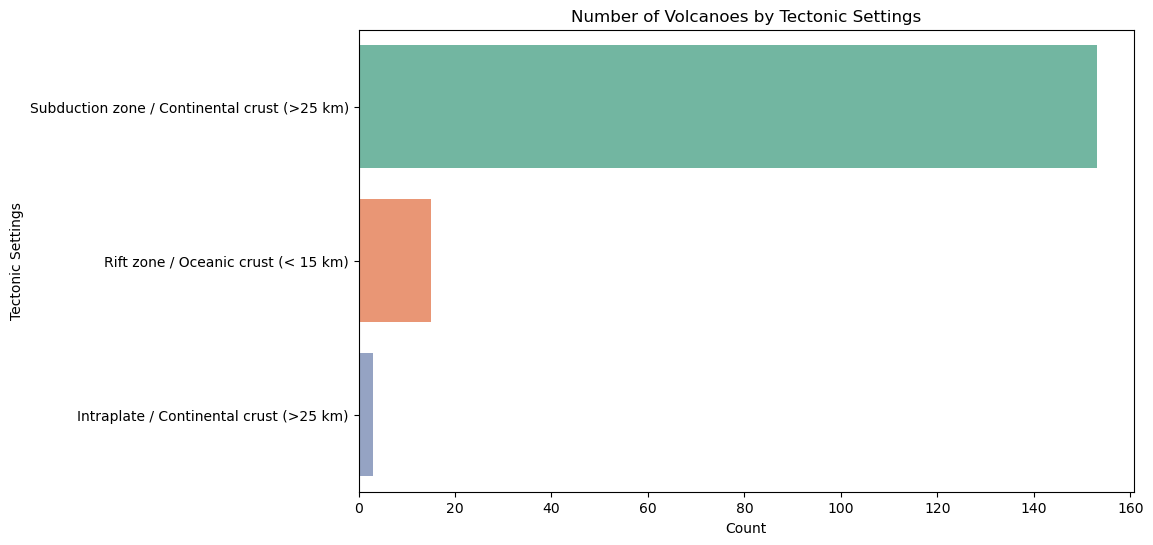

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Tectonic Settings', data=volcano_list_SA_cleaned, palette='Set2', order=volcano_list_SA_cleaned['Tectonic Settings'].value_counts().index)
plt.title('Number of Volcanoes by Tectonic Settings')
plt.xlabel('Count')
plt.ylabel('Tectonic Settings')
plt.show()

This bar chart shows the number of volcanoes categorized by tectonic settings in Southern America.

### 3.7 Elevation Distribution 

#### 3.7.1 North America

/opt/anaconda3/envs/sio113_2024/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


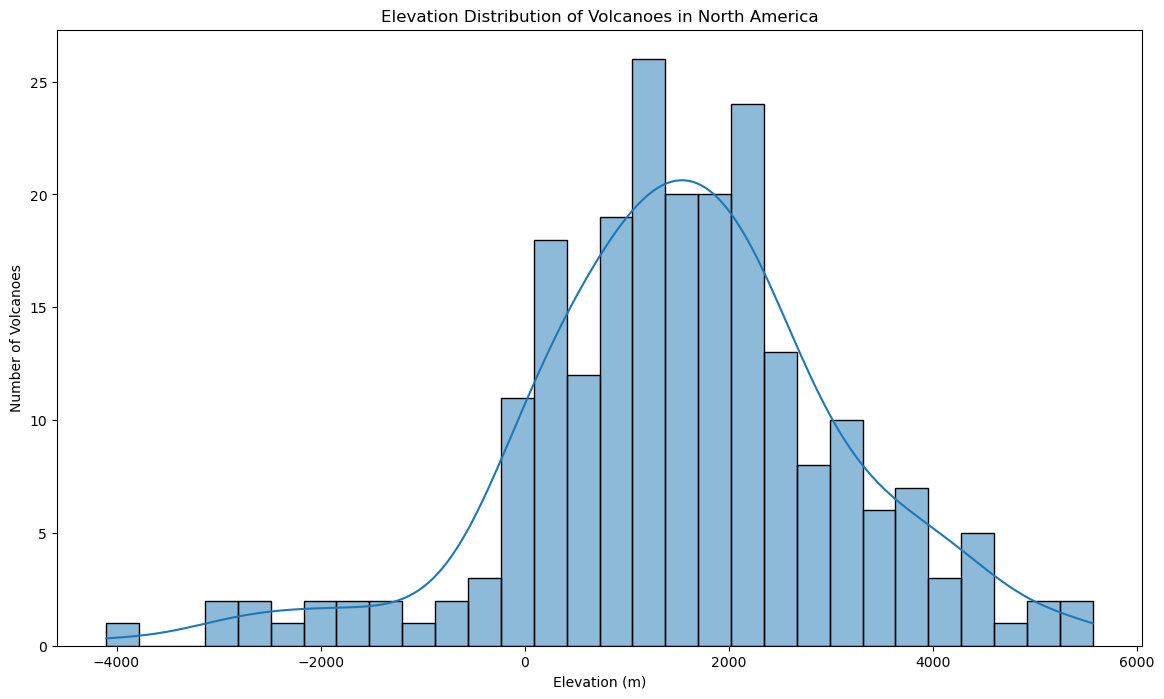

In [17]:
# Convert 'Elevation' to numeric, forcing non-numeric values to NaN
volcano_list_NA_cleaned.loc[:, 'Elevation'] = pd.to_numeric(volcano_list_NA_cleaned['Elevation'], errors='coerce')

# Plot the elevation distribution
plt.figure(figsize=(14, 8))
sns.histplot(volcano_list_NA_cleaned['Elevation'].dropna(), bins=30, kde=True)
plt.title('Elevation Distribution of Volcanoes in North America')
plt.xlabel('Elevation (m)')
plt.ylabel('Number of Volcanoes')
plt.show()

This histogram shows the distribution of volcano elevations in Northern America, providing insight into the range and frequency of volcano heights.

#### 3.7.2 South America

/opt/anaconda3/envs/sio113_2024/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


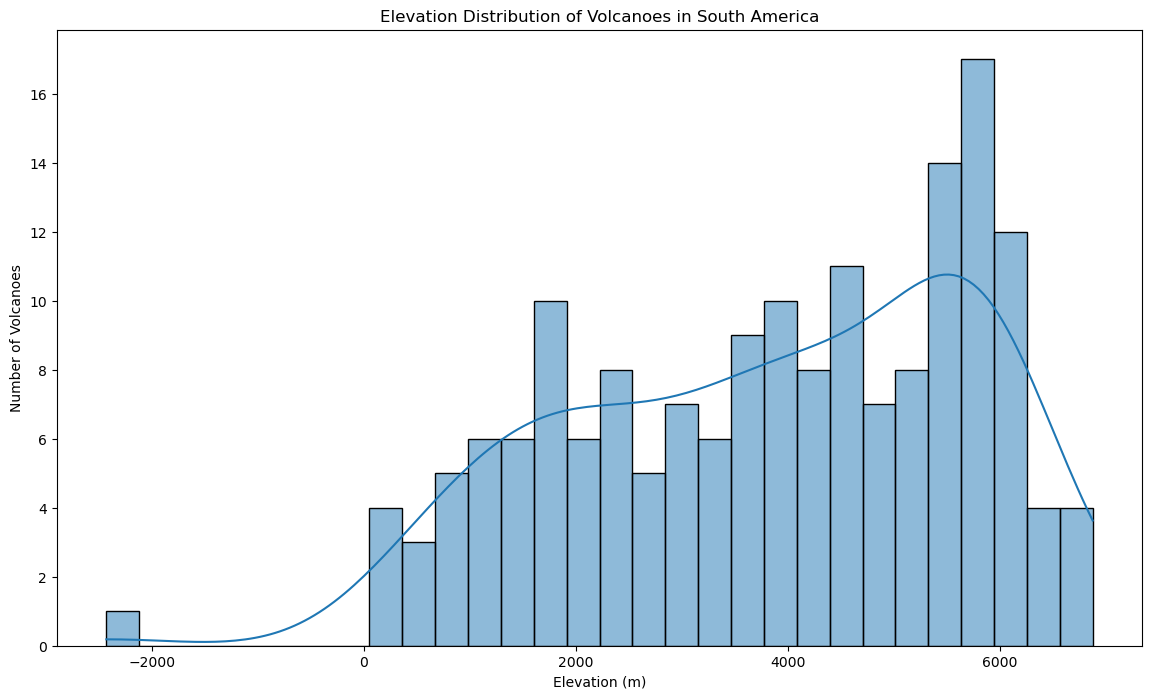

In [18]:
# Convert 'Elevation' to numeric, forcing non-numeric values to NaN
volcano_list_SA_cleaned.loc[:, 'Elevation'] = pd.to_numeric(volcano_list_SA_cleaned['Elevation'], errors='coerce')

# Plot the elevation distribution
plt.figure(figsize=(14, 8))
sns.histplot(volcano_list_SA_cleaned['Elevation'].dropna(), bins=30, kde=True)
plt.title('Elevation Distribution of Volcanoes in South America')
plt.xlabel('Elevation (m)')
plt.ylabel('Number of Volcanoes')
plt.show()

This histogram shows the distribution of volcano elevations in Southern America, providing insight into the range and frequency of volcano heights.

### 3.8 Population Proximity

#### 3.8.1 North America

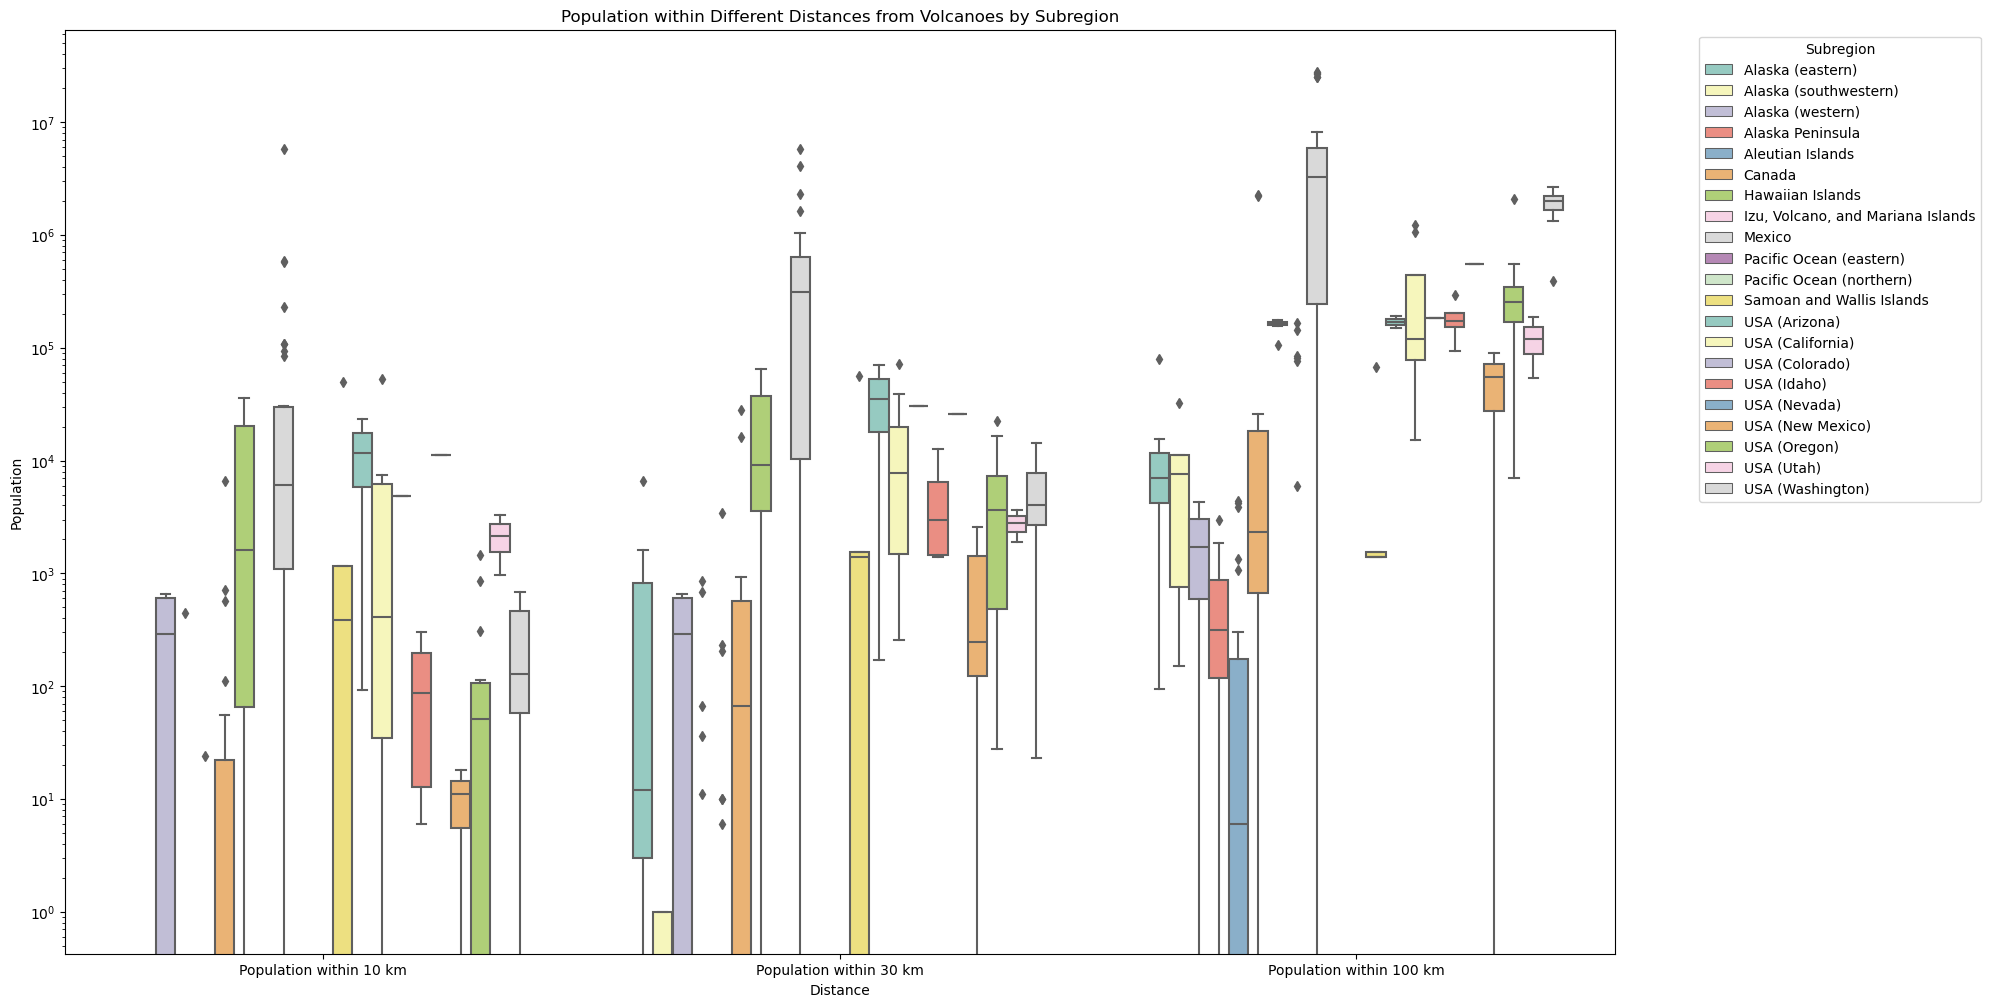

Detailed Statistics:
          Population
count  6.750000e+02
mean   4.053183e+05
std    2.419869e+06
min    0.000000e+00
25%    0.000000e+00
50%    4.700000e+01
75%    7.520500e+03
max    2.803079e+07


In [19]:
# Ensure population columns are numeric
volcano_list_NA_cleaned['Population within 10 km'] = pd.to_numeric(volcano_list_NA_cleaned['Population within 10 km'], errors='coerce')
volcano_list_NA_cleaned['Population within 30 km'] = pd.to_numeric(volcano_list_NA_cleaned['Population within 30 km'], errors='coerce')
volcano_list_NA_cleaned['Population within 100 km'] = pd.to_numeric(volcano_list_NA_cleaned['Population within 100 km'], errors='coerce')

# Ensure subregion column is treated as a category
volcano_list_NA_cleaned['Subregion'] = volcano_list_NA_cleaned['Subregion'].astype('category')

# Melt the DataFrame to long format for easier plotting with seaborn
population_data_by_subregion = volcano_list_NA_cleaned.melt(id_vars=['Subregion'], value_vars=['Population within 10 km', 'Population within 30 km', 'Population within 100 km'], var_name='Distance', value_name='Population')

population_data = population_data_by_subregion

# Box plots for populations within different distances by subregion
plt.figure(figsize=(20, 12))
sns.boxplot(x='Distance', y='Population', hue='Subregion', data=population_data_by_subregion, palette='Set3')
plt.title('Population within Different Distances from Volcanoes by Subregion')
plt.xlabel('Distance')
plt.ylabel('Population')
plt.yscale('log')  
plt.legend(title='Subregion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Detailed statistics
detailed_stats = population_data.describe()
print("Detailed Statistics:\n", detailed_stats)

These box plots show the population within different distances from volcanoes in Northern America, highlighting potential hazards to nearby communities.

#### 3.8.2 South America

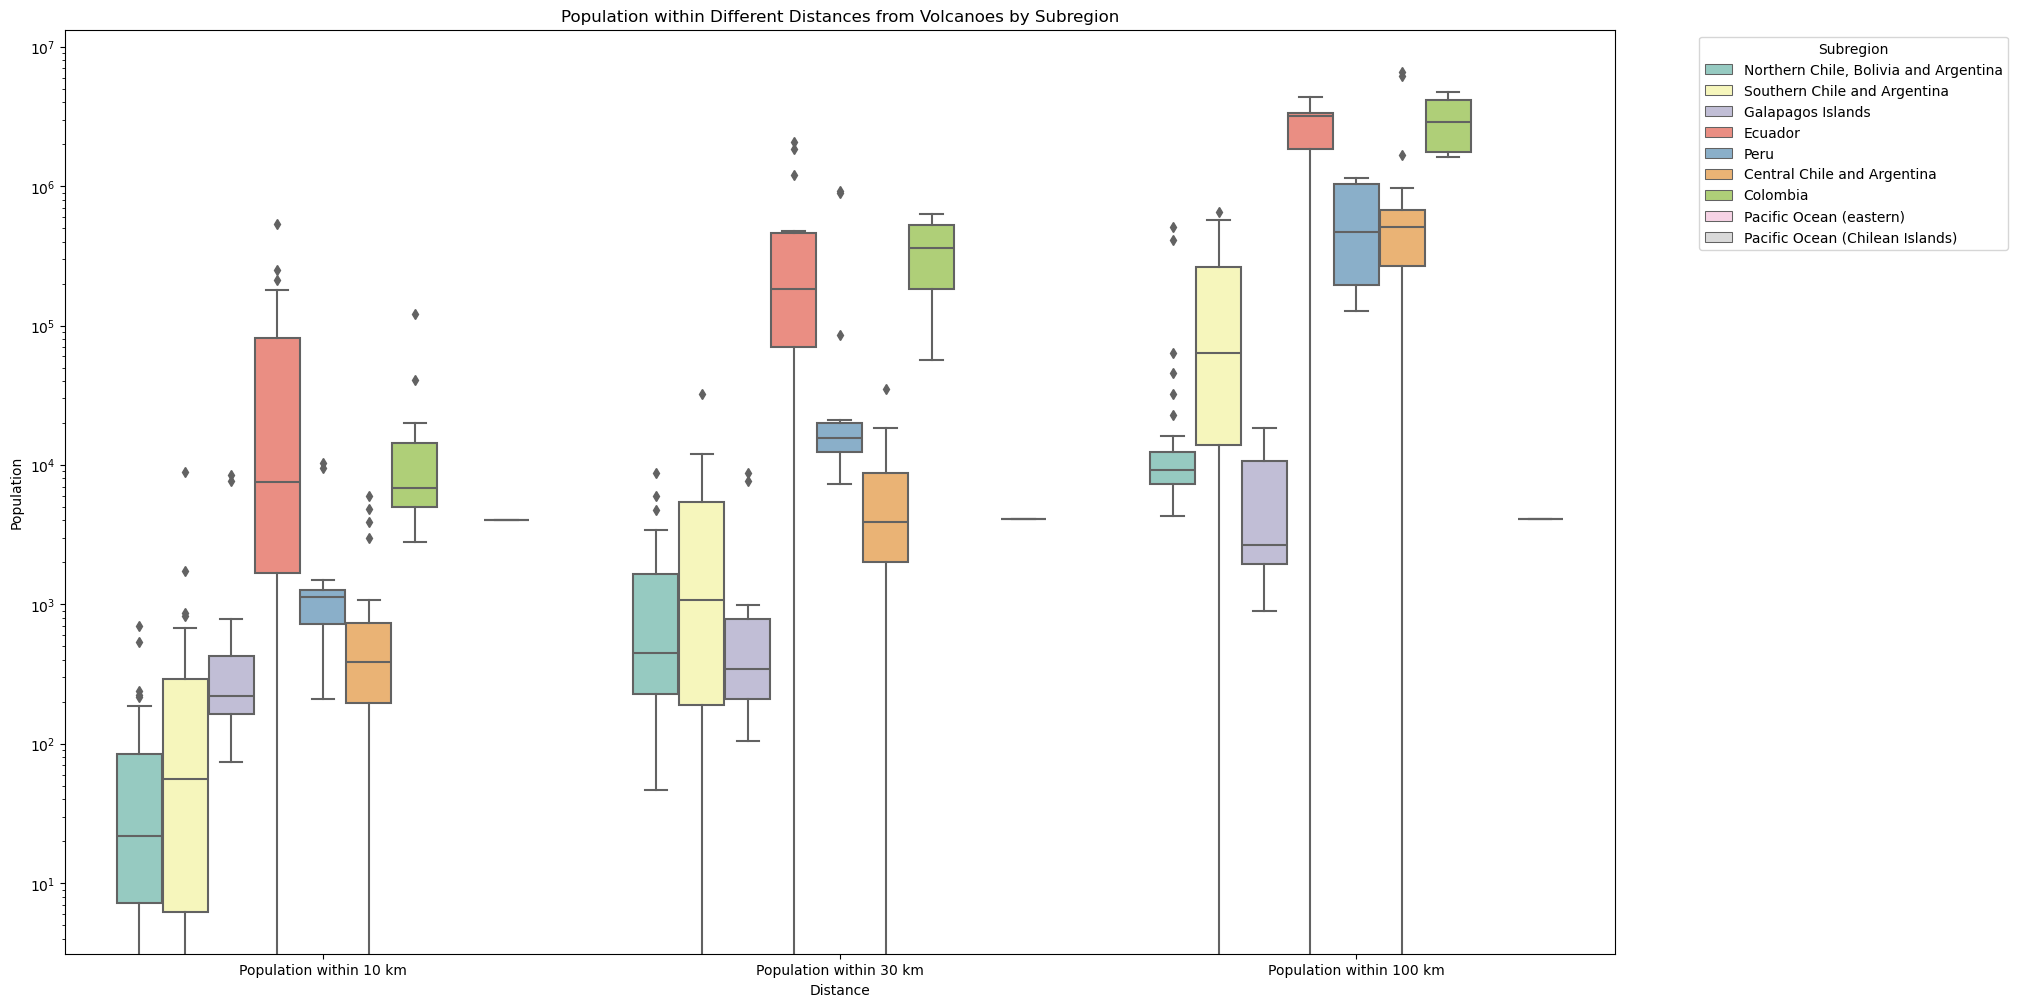

Detailed Statistics:
          Population
count  5.130000e+02
mean   3.142094e+05
std    8.785789e+05
min    0.000000e+00
25%    3.250000e+02
50%    5.287000e+03
75%    9.629400e+04
max    6.615248e+06


In [20]:
# Ensure population columns are numeric
volcano_list_SA_cleaned.loc[:, 'Population within 10 km'] = pd.to_numeric(volcano_list_SA_cleaned['Population within 10 km'], errors='coerce')
volcano_list_SA_cleaned.loc[:, 'Population within 30 km'] = pd.to_numeric(volcano_list_SA_cleaned['Population within 30 km'], errors='coerce')
volcano_list_SA_cleaned.loc[:, 'Population within 100 km'] = pd.to_numeric(volcano_list_SA_cleaned['Population within 100 km'], errors='coerce')

# Ensure subregion column is treated as a category
volcano_list_SA_cleaned.loc[:, 'Subregion'] = volcano_list_SA_cleaned['Subregion'].astype('category')

# Melt the DataFrame to long format for easier plotting with seaborn
population_data_by_subregion = volcano_list_SA_cleaned.melt(id_vars=['Subregion'], value_vars=['Population within 10 km', 'Population within 30 km', 'Population within 100 km'], var_name='Distance', value_name='Population')

population_data = population_data_by_subregion

# Box plots for populations within different distances by subregion
plt.figure(figsize=(20, 12))
sns.boxplot(x='Distance', y='Population', hue='Subregion', data=population_data_by_subregion, palette='Set3')
plt.title('Population within Different Distances from Volcanoes by Subregion')
plt.xlabel('Distance')
plt.ylabel('Population')
plt.yscale('log')  
plt.legend(title='Subregion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Detailed statistics
detailed_stats = population_data.describe()
print("Detailed Statistics:\n", detailed_stats)

These box plots show the population within different distances from volcanoes in Southern America, highlighting potential hazards to nearby communities.

## 4 Data Visualization and Analysis - Eruption 

In this section, we will delve into the detailed analysis of eruption data. We will examine eruption locations, timing, frequency, and the Volcanic Explosivity Index (VEI). Various visualizations, such as scatter plots and bar charts, will help us understand the relationships between these variables and provide insights into the temporal and spatial patterns of volcanic eruptions.

The visualization and analysis will focus on:
- Mapping the locations of volcanic eruptions.
- Analyzing the timing and frequency of eruptions to identify patterns and trends.
- Exploring the VEI to understand the explosivity of eruptions and its correlation with geographical factors.
- Examining the methods used to confirm eruptions and their frequency.
- Investigating the start and end months of eruptions to identify seasonal patterns.
- Evaluating eruption frequency over long-term intervals to understand historical eruption trends.

### 4.1 Eruption Locations

#### 4.1.1 North America

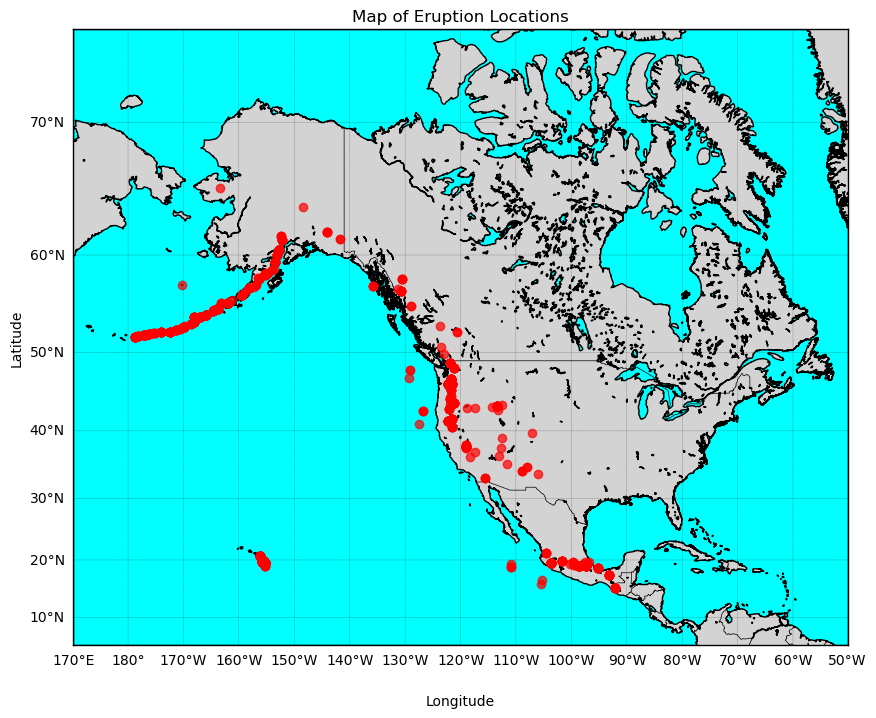

In [21]:
# Convert latitude and longitude to numeric, forcing non-numeric values to NaN
eruption_results_NA_df['Latitude'] = pd.to_numeric(eruption_results_NA_df['Latitude'], errors='coerce')
eruption_results_NA_df['Longitude'] = pd.to_numeric(eruption_results_NA_df['Longitude'], errors='coerce')

# Create the map
plt.figure(figsize=(14, 8))
m = Basemap(projection='merc', llcrnrlat=5, urcrnrlat=75, llcrnrlon=-190, urcrnrlon=-50, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Draw meridians and parallels
m.drawmeridians(range(-180, 180, 10), labels=[1, 0, 0, 1], linewidth=0.2)
m.drawparallels(range(-90, 90, 10), labels=[1, 0, 0, 1], linewidth=0.2)

# Plot the eruption locations
x, y = m(eruption_results_NA_df['Longitude'].values, eruption_results_NA_df['Latitude'].values)
m.scatter(x, y, marker='o', color='red', zorder=5, alpha=0.7)


plt.xlabel('Longitude', labelpad=35)  
plt.ylabel('Latitude', labelpad=35) 
plt.title('Map of Eruption Locations')
plt.show()

This map shows the locations of volcanic eruptions in Northern America, with red dots representing the eruption sites.

#### 4.1.2 South America

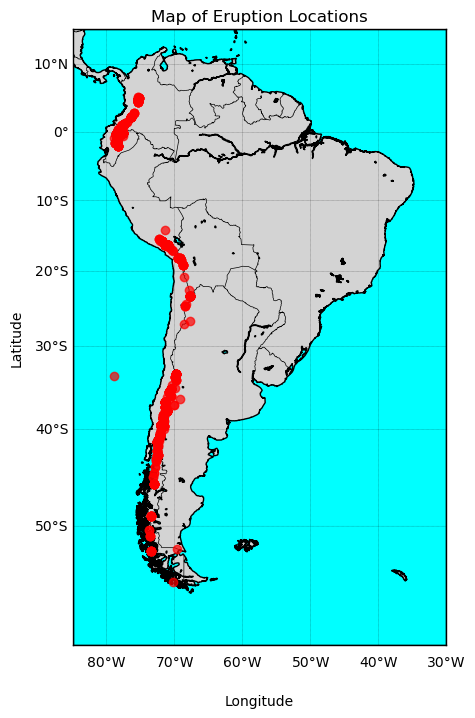

In [22]:
# Convert latitude and longitude to numeric, forcing non-numeric values to NaN
eruption_results_SA_df['Latitude'] = pd.to_numeric(eruption_results_SA_df['Latitude'], errors='coerce')
eruption_results_SA_df['Longitude'] = pd.to_numeric(eruption_results_SA_df['Longitude'], errors='coerce')

# Create the map
plt.figure(figsize=(14, 8))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Draw meridians and parallels
m.drawmeridians(range(-180, 180, 10), labels=[1, 0, 0, 1], linewidth=0.2)
m.drawparallels(range(-90, 90, 10), labels=[1, 0, 0, 1], linewidth=0.2)

# Plot the eruption locations
x, y = m(eruption_results_SA_df['Longitude'].values, eruption_results_SA_df['Latitude'].values)
m.scatter(x, y, marker='o', color='red', zorder=5, alpha=0.7)

plt.xlabel('Longitude', labelpad=35)  
plt.ylabel('Latitude', labelpad=35) 
plt.title('Map of Eruption Locations')
plt.show()

This map shows the locations of volcanic eruptions in Southern America, with red dots representing the eruption sites.

### 4.2 Eruption Timing and Frequency

#### 4.2.1 North America

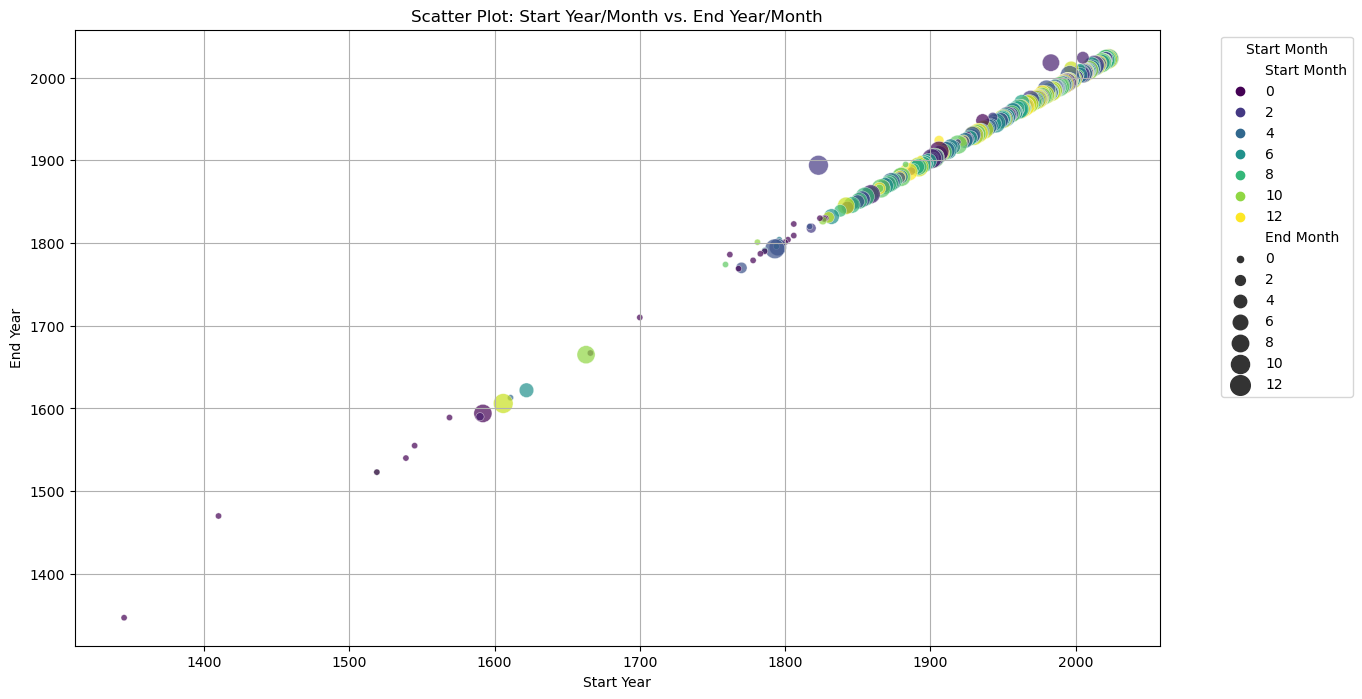

In [23]:
# Convert columns to numeric, forcing non-numeric values to NaN
eruption_results_NA_df['Start Year'] = pd.to_numeric(eruption_results_NA_df['Start Year'], errors='coerce')
eruption_results_NA_df['Start Month'] = pd.to_numeric(eruption_results_NA_df['Start Month'], errors='coerce')
eruption_results_NA_df['End Year'] = pd.to_numeric(eruption_results_NA_df['End Year'], errors='coerce')
eruption_results_NA_df['End Month'] = pd.to_numeric(eruption_results_NA_df['End Month'], errors='coerce')

# Drop rows with NaN values in the relevant columns
eruption_results_cleaned = eruption_results_NA_df.dropna(subset=['Start Year', 'Start Month', 'End Year', 'End Month'])

# Create a scatter plot with start and end times
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Start Year', y='End Year', hue='Start Month', size='End Month', data=eruption_results_cleaned, palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Scatter Plot: Start Year/Month vs. End Year/Month')
plt.xlabel('Start Year')
plt.ylabel('End Year')
plt.legend(title='Start Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

 This scatter plot visualizes the start and end years/months of eruptions in Northern America, with different sizes and colors indicating the duration and time of eruptions.

#### 4.2.2 South America

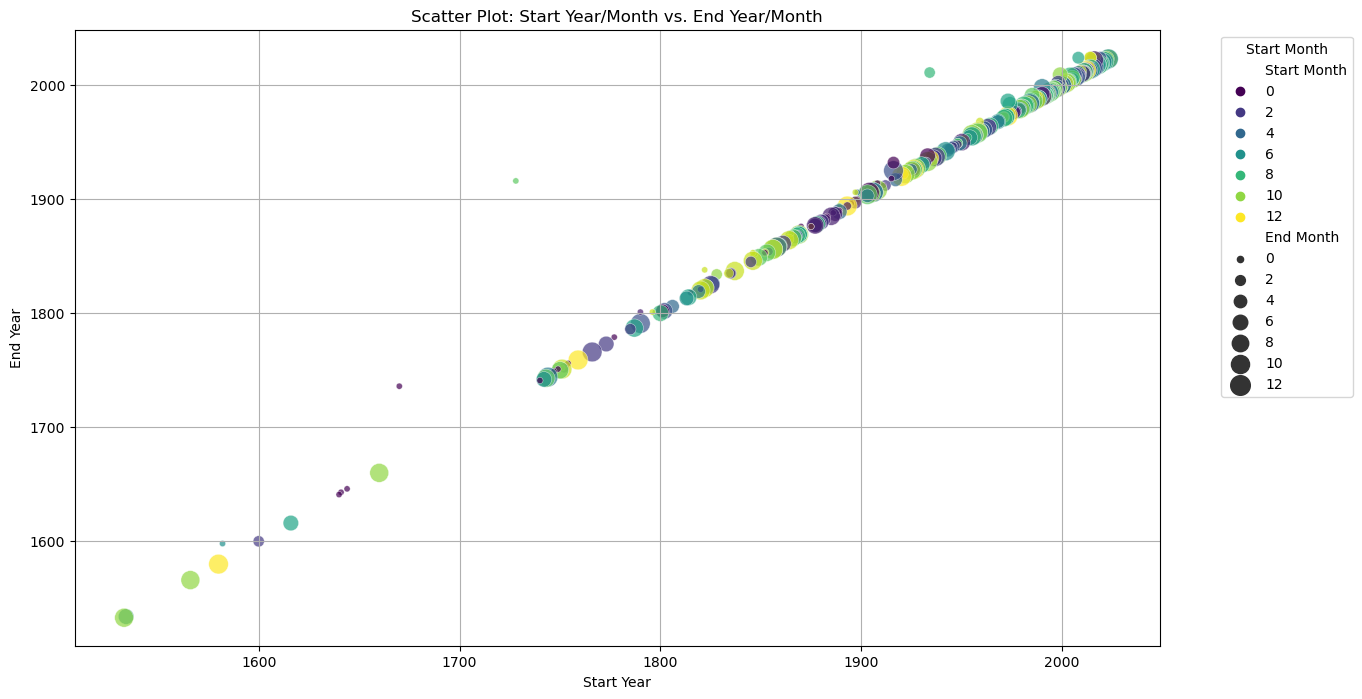

In [24]:
# Convert columns to numeric, forcing non-numeric values to NaN
eruption_results_SA_df['Start Year'] = pd.to_numeric(eruption_results_SA_df['Start Year'], errors='coerce')
eruption_results_SA_df['Start Month'] = pd.to_numeric(eruption_results_SA_df['Start Month'], errors='coerce')
eruption_results_SA_df['End Year'] = pd.to_numeric(eruption_results_SA_df['End Year'], errors='coerce')
eruption_results_SA_df['End Month'] = pd.to_numeric(eruption_results_SA_df['End Month'], errors='coerce')

# Drop rows with NaN values in the relevant columns
eruption_results_cleaned = eruption_results_SA_df.dropna(subset=['Start Year', 'Start Month', 'End Year', 'End Month'])

# Create a scatter plot with start and end times
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Start Year', y='End Year', hue='Start Month', size='End Month', data=eruption_results_cleaned, palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Scatter Plot: Start Year/Month vs. End Year/Month')
plt.xlabel('Start Year')
plt.ylabel('End Year')
plt.legend(title='Start Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

This scatter plot visualizes the start and end years/months of eruptions in Southern America, with different sizes and colors indicating the duration and time of eruptions.

### 4.3 Eruption Explosivity Index

#### 4.3.1 North America

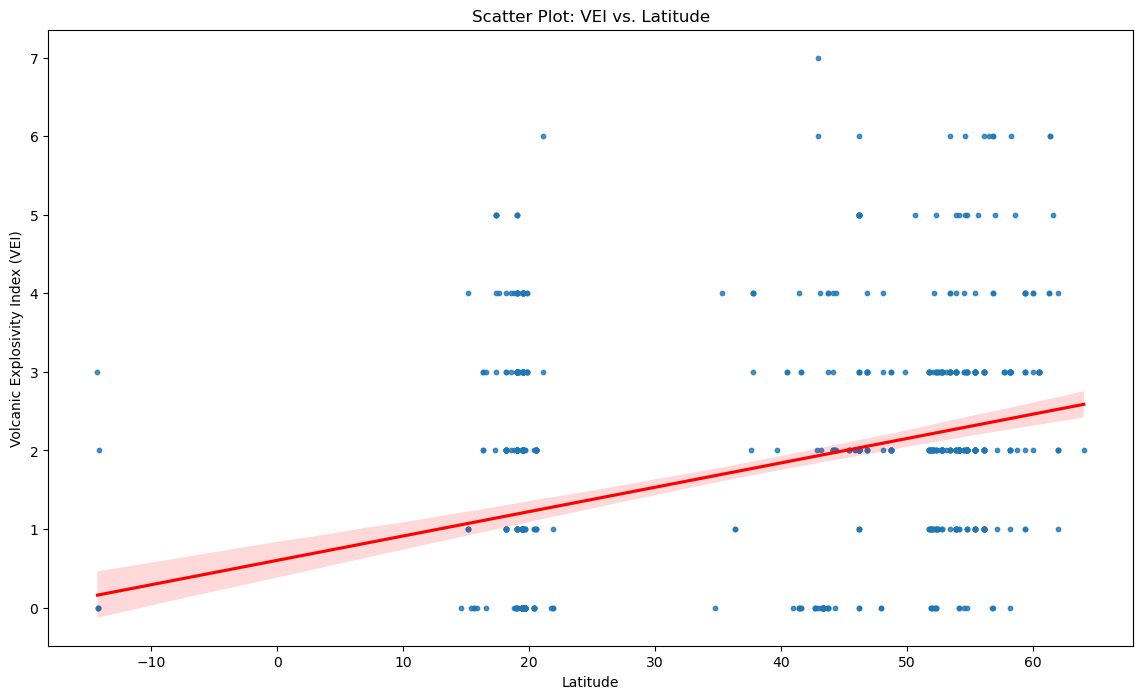

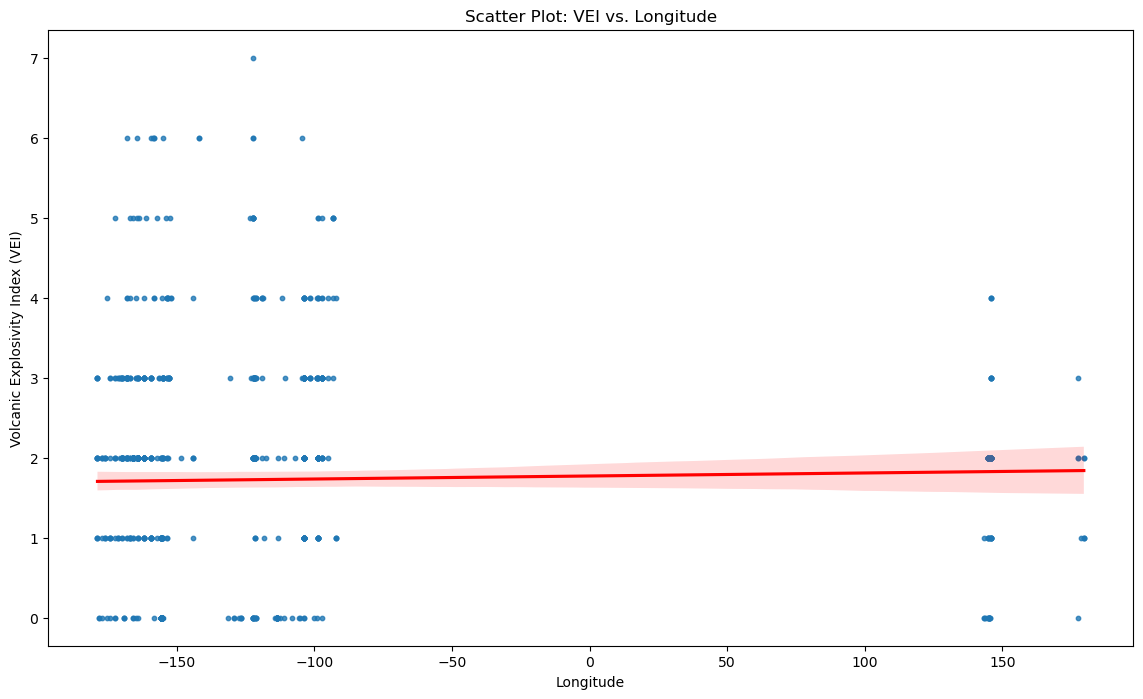

Correlation coefficient between VEI and Latitude: 0.36769787019534783
Correlation coefficient between VEI and Longitude: 0.021452281718222114


In [25]:
# Convert relevant columns to numeric, forcing non-numeric values to NaN
eruption_results_NA_df['VEI'] = pd.to_numeric(eruption_results_NA_df['VEI'], errors='coerce')
eruption_results_NA_df['Latitude'] = pd.to_numeric(eruption_results_NA_df['Latitude'], errors='coerce')
eruption_results_NA_df['Longitude'] = pd.to_numeric(eruption_results_NA_df['Longitude'], errors='coerce')

# Drop rows with NaN values in the relevant columns
eruption_results_cleaned = eruption_results_NA_df.dropna(subset=['VEI', 'Latitude', 'Longitude'])

# Create scatter plot with regression line for VEI vs. Latitude
plt.figure(figsize=(14, 8))
sns.regplot(x='Latitude', y='VEI', data=eruption_results_cleaned, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Scatter Plot: VEI vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Volcanic Explosivity Index (VEI)')
plt.show()

# Create scatter plot with regression line for VEI vs. Longitude
plt.figure(figsize=(14, 8))
sns.regplot(x='Longitude', y='VEI', data=eruption_results_cleaned, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Scatter Plot: VEI vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Volcanic Explosivity Index (VEI)')
plt.show()

# Compute the correlation coefficients
correlation_latitude = eruption_results_cleaned['VEI'].corr(eruption_results_cleaned['Latitude'])
correlation_longitude = eruption_results_cleaned['VEI'].corr(eruption_results_cleaned['Longitude'])
print(f"Correlation coefficient between VEI and Latitude: {correlation_latitude}")
print(f"Correlation coefficient between VEI and Longitude: {correlation_longitude}")

These scatter plots show the relationship between the Volcanic Explosivity Index (VEI) and the geographical coordinates (latitude and longitude) of eruptions in Northern America, with correlation coefficients indicating the strength of the relationships.

#### 4.3.2 South America

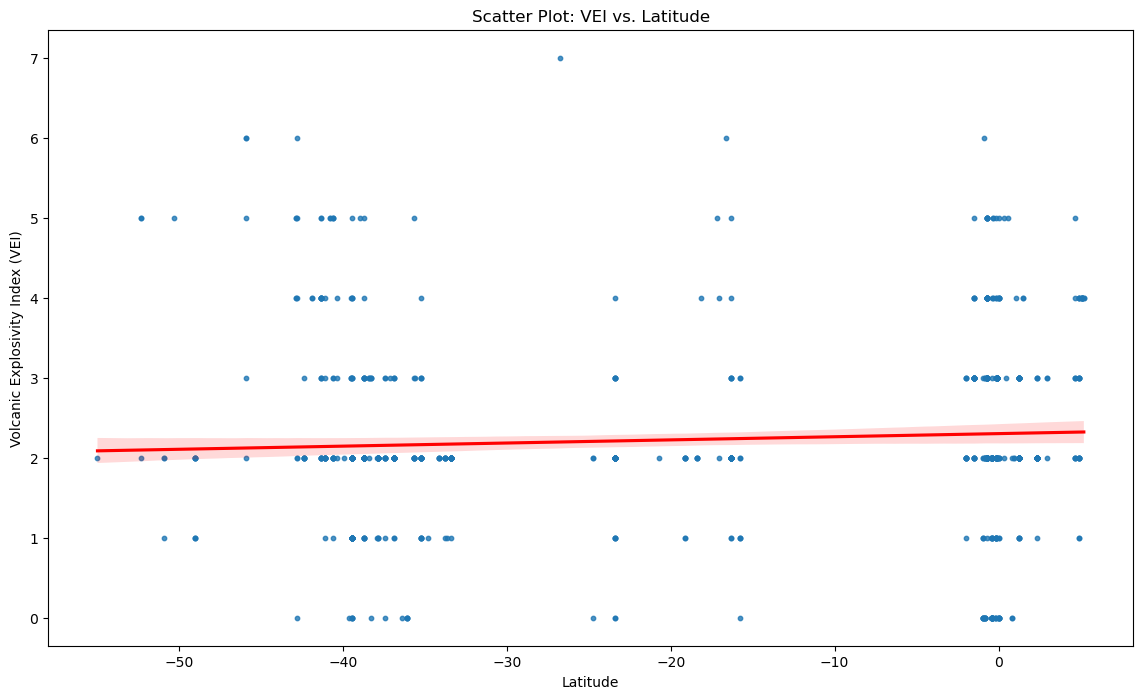

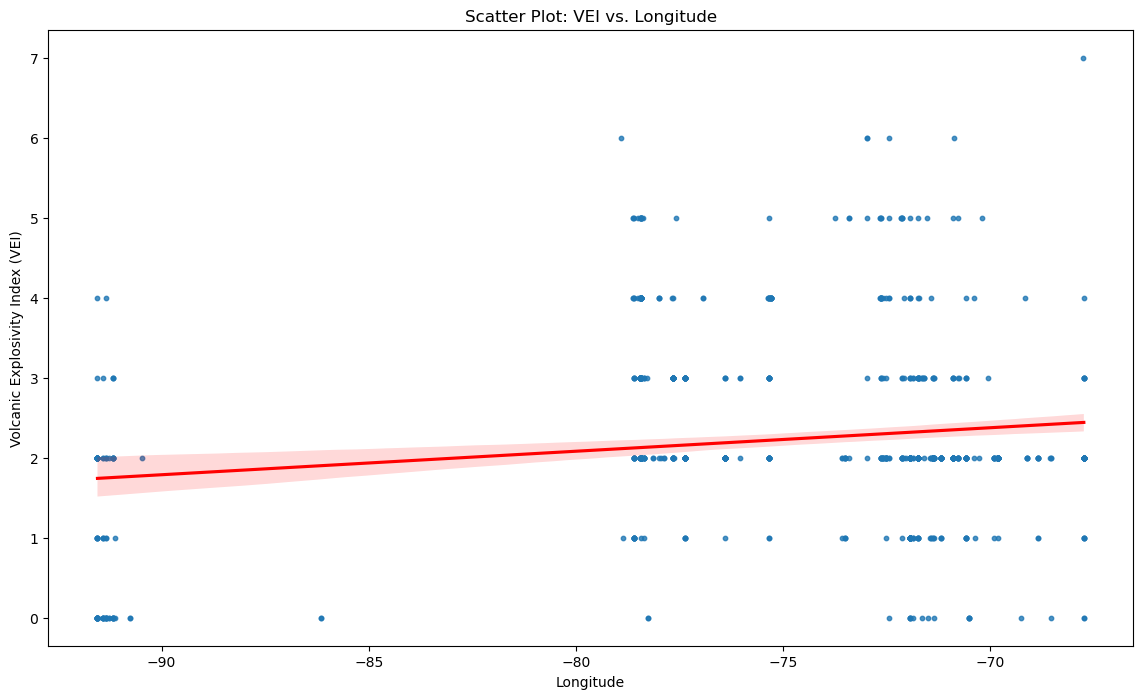

Correlation coefficient between VEI and Latitude: 0.06576084475268314
Correlation coefficient between VEI and Longitude: 0.15702221784297066


In [26]:
# Convert relevant columns to numeric, forcing non-numeric values to NaN
eruption_results_SA_df['VEI'] = pd.to_numeric(eruption_results_SA_df['VEI'], errors='coerce')
eruption_results_SA_df['Latitude'] = pd.to_numeric(eruption_results_SA_df['Latitude'], errors='coerce')
eruption_results_SA_df['Longitude'] = pd.to_numeric(eruption_results_SA_df['Longitude'], errors='coerce')

# Drop rows with NaN values in the relevant columns
eruption_results_cleaned = eruption_results_SA_df.dropna(subset=['VEI', 'Latitude', 'Longitude'])

# Create scatter plot with regression line for VEI vs. Latitude
plt.figure(figsize=(14, 8))
sns.regplot(x='Latitude', y='VEI', data=eruption_results_cleaned, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Scatter Plot: VEI vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Volcanic Explosivity Index (VEI)')
plt.show()

# Create scatter plot with regression line for VEI vs. Longitude
plt.figure(figsize=(14, 8))
sns.regplot(x='Longitude', y='VEI', data=eruption_results_cleaned, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Scatter Plot: VEI vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Volcanic Explosivity Index (VEI)')
plt.show()

# Compute the correlation coefficients
correlation_latitude = eruption_results_cleaned['VEI'].corr(eruption_results_cleaned['Latitude'])
correlation_longitude = eruption_results_cleaned['VEI'].corr(eruption_results_cleaned['Longitude'])
print(f"Correlation coefficient between VEI and Latitude: {correlation_latitude}")
print(f"Correlation coefficient between VEI and Longitude: {correlation_longitude}")

These scatter plots show the relationship between the Volcanic Explosivity Index (VEI) and the geographical coordinates (latitude and longitude) of eruptions in Southern America, with correlation coefficients indicating the strength of the relationships.

### 4.4 Eruption Frequency by Evidence Method

#### 4.4.1 North America

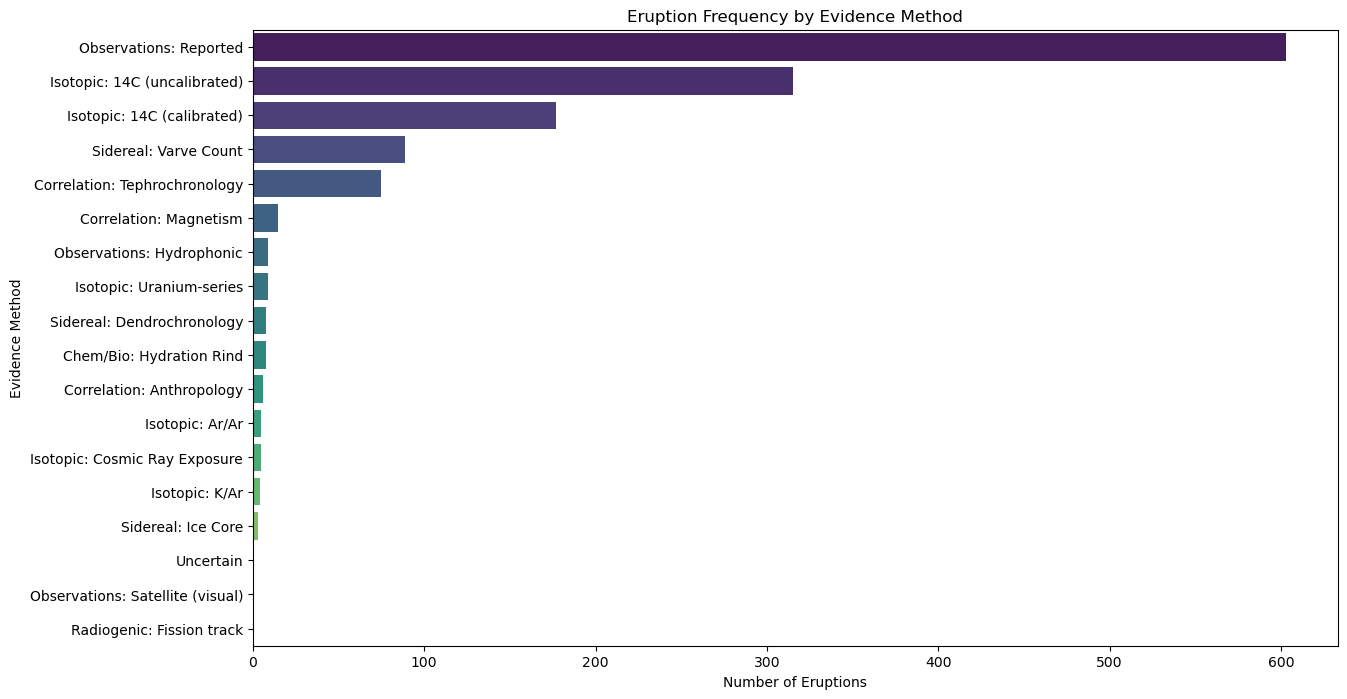

In [27]:
# Drop rows with NaN values in the 'Evidence Method (dating)' column
eruption_results_cleaned = eruption_results_NA_df.dropna(subset=['Evidence Method (dating)'])

# Plot the eruption frequency by evidence method
plt.figure(figsize=(14, 8))
sns.countplot(y='Evidence Method (dating)', data=eruption_results_cleaned, palette='viridis', order=eruption_results_cleaned['Evidence Method (dating)'].value_counts().index)
plt.title('Eruption Frequency by Evidence Method')
plt.xlabel('Number of Eruptions')
plt.ylabel('Evidence Method')
plt.show()

This bar chart shows the frequency of eruptions in Northern America categorized by the method of evidence used to confirm the eruptions.

#### 4.4.2 South America

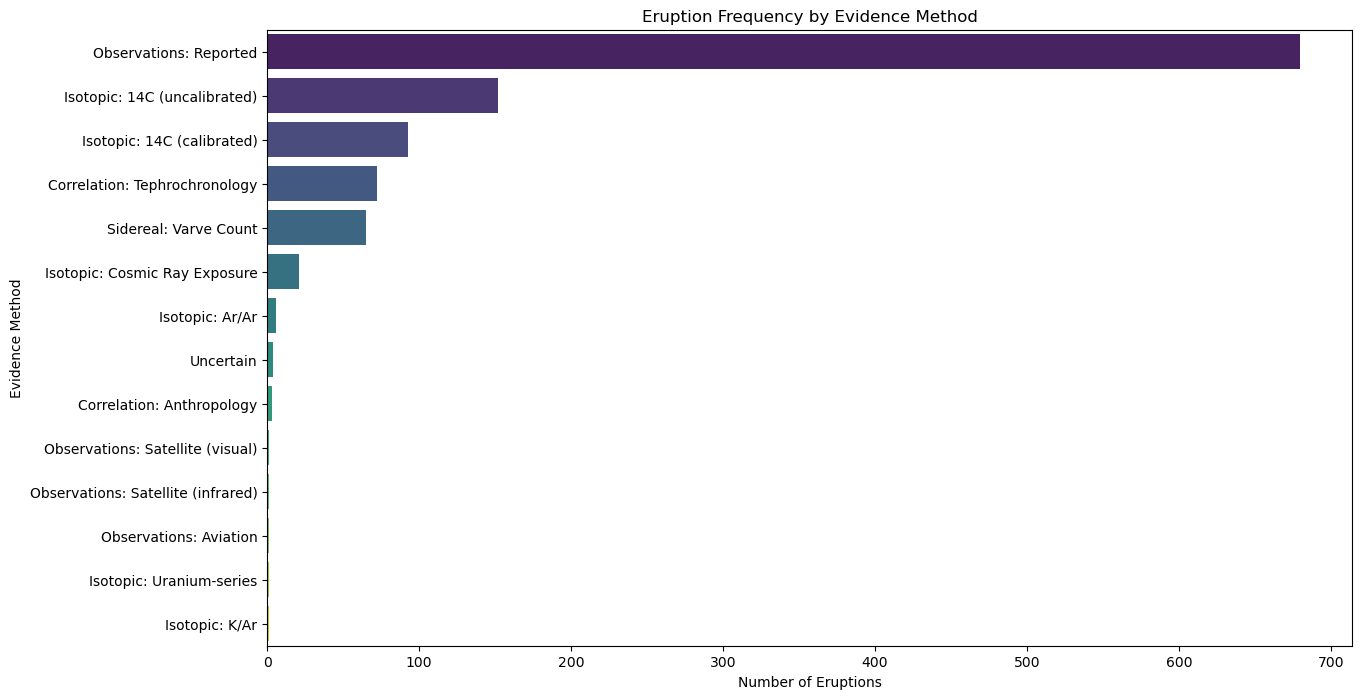

In [28]:
# Drop rows with NaN values in the 'Evidence Method (dating)' column
eruption_results_cleaned = eruption_results_SA_df.dropna(subset=['Evidence Method (dating)'])

# Plot the eruption frequency by evidence method
plt.figure(figsize=(14, 8))
sns.countplot(y='Evidence Method (dating)', data=eruption_results_cleaned, palette='viridis', order=eruption_results_cleaned['Evidence Method (dating)'].value_counts().index)
plt.title('Eruption Frequency by Evidence Method')
plt.xlabel('Number of Eruptions')
plt.ylabel('Evidence Method')
plt.show()

This bar chart shows the frequency of eruptions in Southern America categorized by the method of evidence used to confirm the eruptions.

### 4.5 Eruption Frequency by Start and End Months

#### 4.5.1 North America

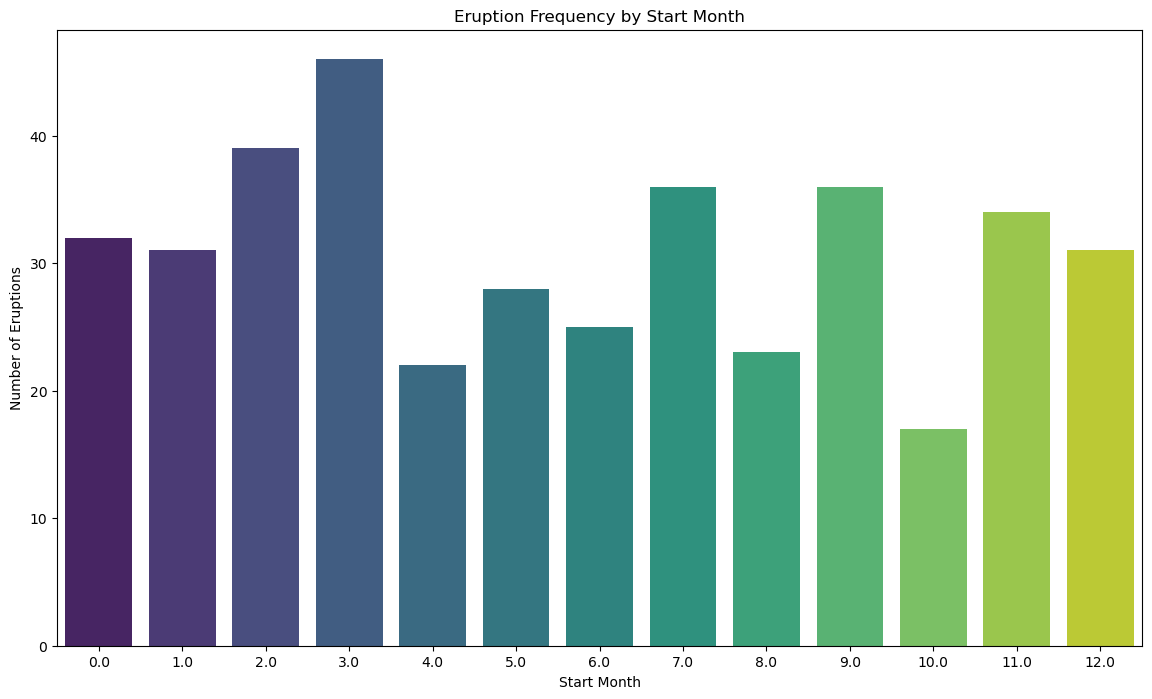

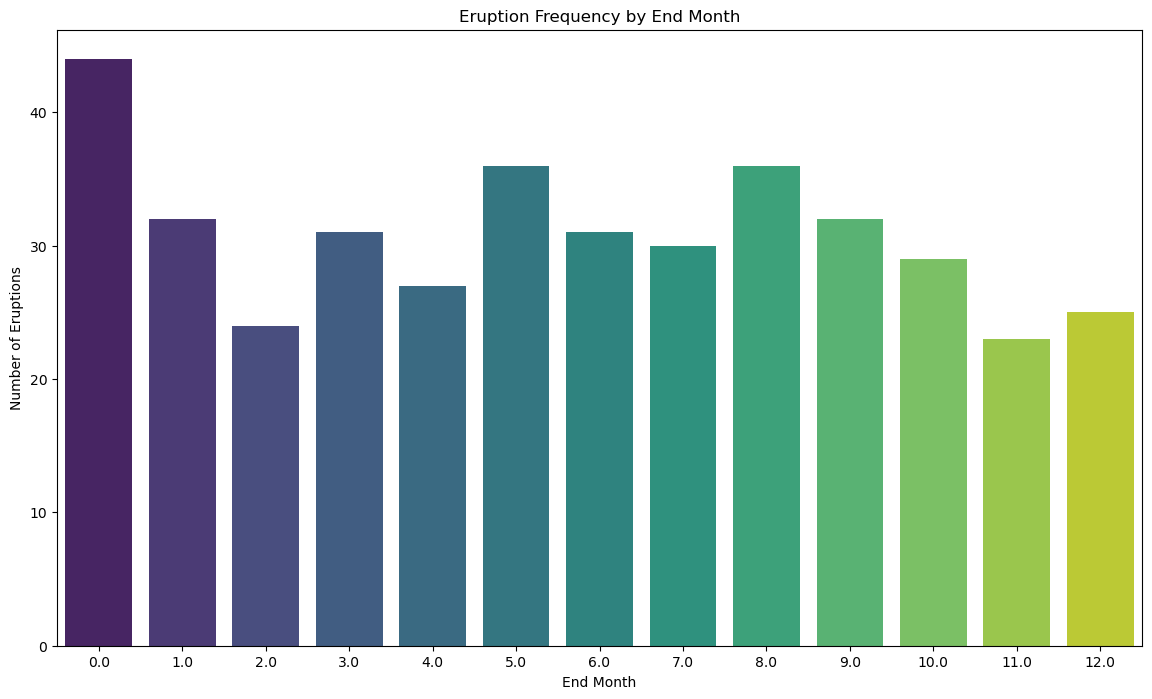

In [29]:
# Convert relevant columns to numeric, forcing non-numeric values to NaN
eruption_results_NA_df['Start Month'] = pd.to_numeric(eruption_results_NA_df['Start Month'], errors='coerce')
eruption_results_NA_df['End Month'] = pd.to_numeric(eruption_results_NA_df['End Month'], errors='coerce')

# Drop rows with NaN values in the relevant columns
eruption_results_cleaned = eruption_results_NA_df.dropna(subset=['Start Month', 'End Month'])

# Plot the eruption frequency by start month
plt.figure(figsize=(14, 8))
sns.countplot(x='Start Month', data=eruption_results_cleaned, palette='viridis')
plt.title('Eruption Frequency by Start Month')
plt.xlabel('Start Month')
plt.ylabel('Number of Eruptions')
plt.show()

# Plot the eruption frequency by end month
plt.figure(figsize=(14, 8))
sns.countplot(x='End Month', data=eruption_results_cleaned, palette='viridis')
plt.title('Eruption Frequency by End Month')
plt.xlabel('End Month')
plt.ylabel('Number of Eruptions')
plt.show()

These bar charts show the frequency of eruptions in Northern America based on the months they start and end.

#### 4.5.2 South America

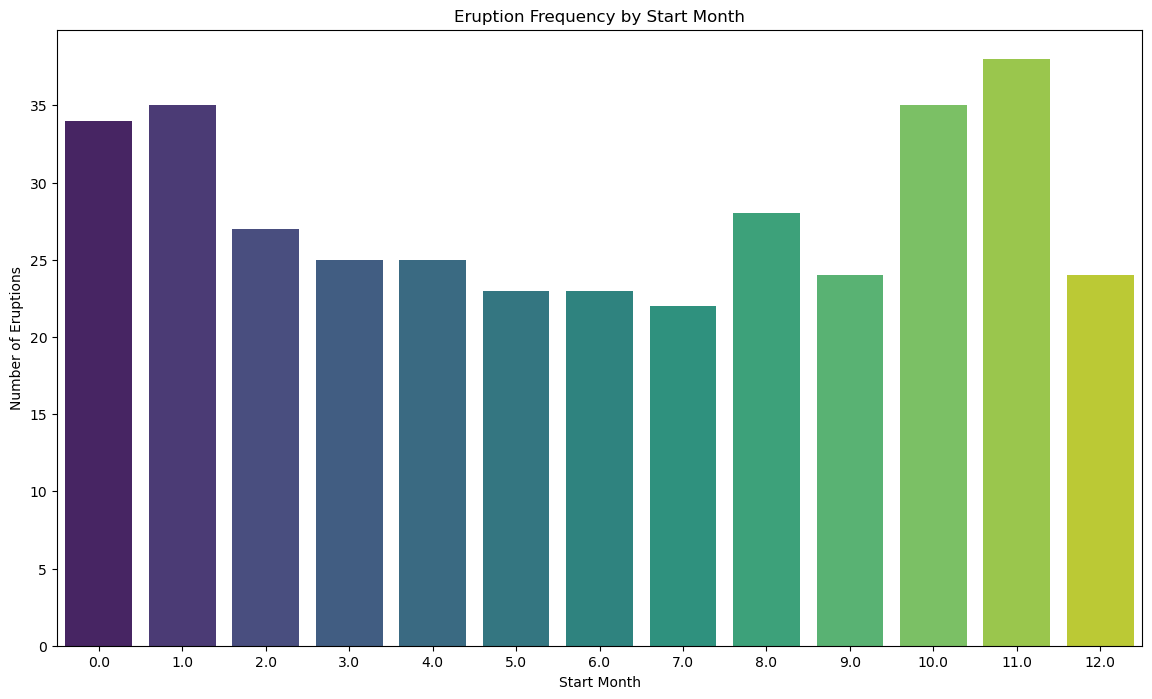

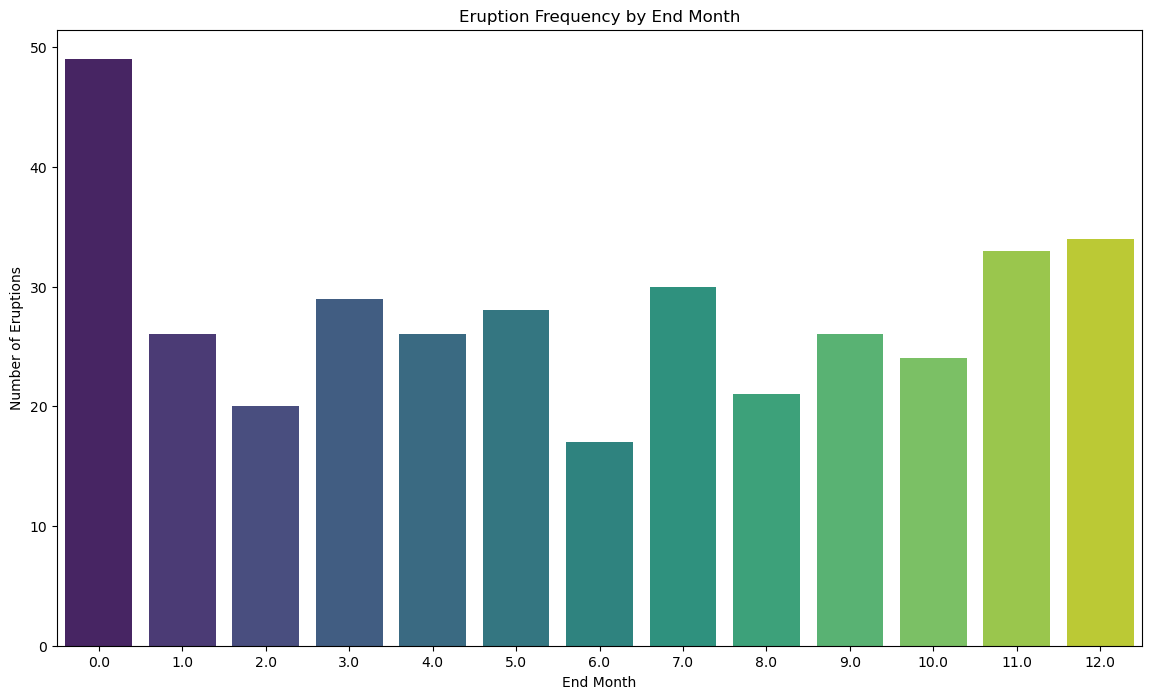

In [30]:
# Convert relevant columns to numeric, forcing non-numeric values to NaN
eruption_results_SA_df['Start Month'] = pd.to_numeric(eruption_results_SA_df['Start Month'], errors='coerce')
eruption_results_SA_df['End Month'] = pd.to_numeric(eruption_results_SA_df['End Month'], errors='coerce')

# Drop rows with NaN values in the relevant columns
eruption_results_cleaned = eruption_results_SA_df.dropna(subset=['Start Month', 'End Month'])

# Plot the eruption frequency by start month
plt.figure(figsize=(14, 8))
sns.countplot(x='Start Month', data=eruption_results_cleaned, palette='viridis')
plt.title('Eruption Frequency by Start Month')
plt.xlabel('Start Month')
plt.ylabel('Number of Eruptions')
plt.show()

# Plot the eruption frequency by end month
plt.figure(figsize=(14, 8))
sns.countplot(x='End Month', data=eruption_results_cleaned, palette='viridis')
plt.title('Eruption Frequency by End Month')
plt.xlabel('End Month')
plt.ylabel('Number of Eruptions')
plt.show()

These bar charts show the frequency of eruptions in Southern America based on the months they start and end.

### 4.6 Eruption Frequency by 500-Year Intervals

#### 4.6.1 North America

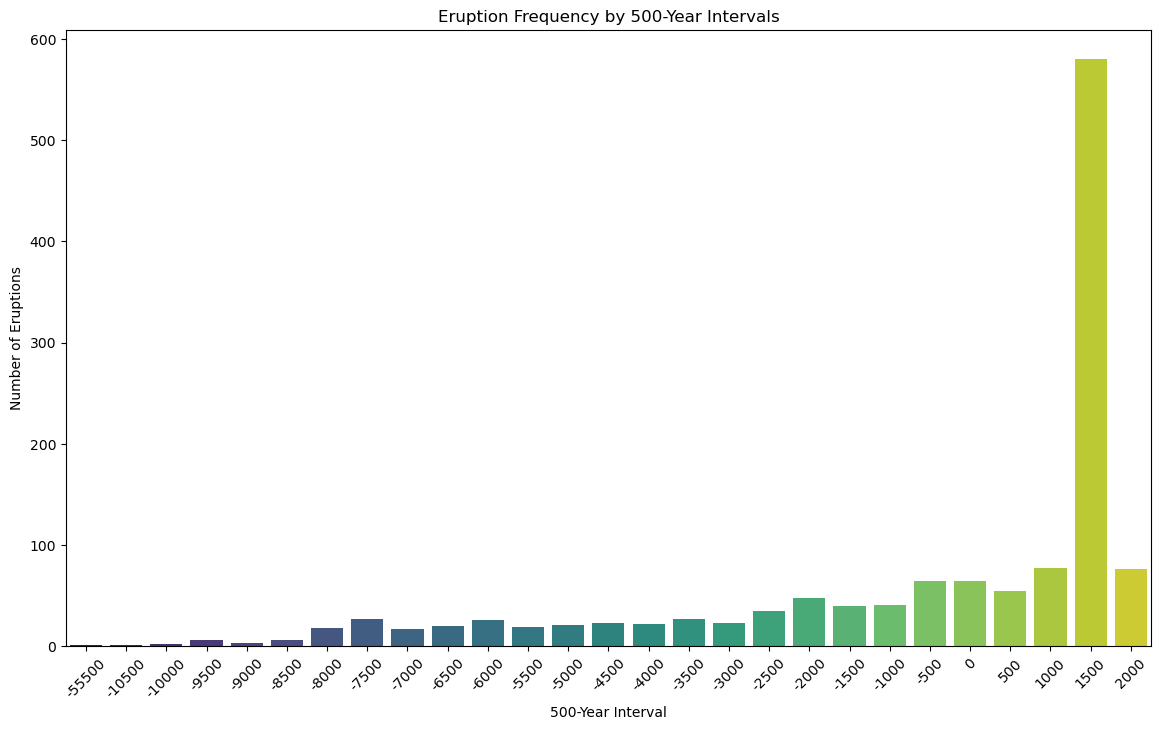

In [31]:
# Convert 'Start Year' to numeric, forcing non-numeric values to NaN
eruption_results_NA_df['Start Year'] = pd.to_numeric(eruption_results_NA_df['Start Year'], errors='coerce')

# Drop rows with NaN values in the 'Start Year' column
eruption_results_cleaned = eruption_results_NA_df.dropna(subset=['Start Year'])

# Create a new column for the 500-year interval
eruption_results_cleaned['Interval'] = (eruption_results_cleaned['Start Year'] // 500) * 500

# Plot the eruption frequency by 500-year interval
plt.figure(figsize=(14, 8))
sns.countplot(x='Interval', data=eruption_results_cleaned, palette='viridis')

# Adjusting the x-axis ticks
plt.title('Eruption Frequency by 500-Year Intervals')
plt.xlabel('500-Year Interval')
plt.ylabel('Number of Eruptions')
plt.xticks(rotation=45)
plt.show()

This bar chart shows the frequency of eruptions in Northern America over 500-year intervals, providing insight into long-term eruption patterns.

#### 4.6.2 South America

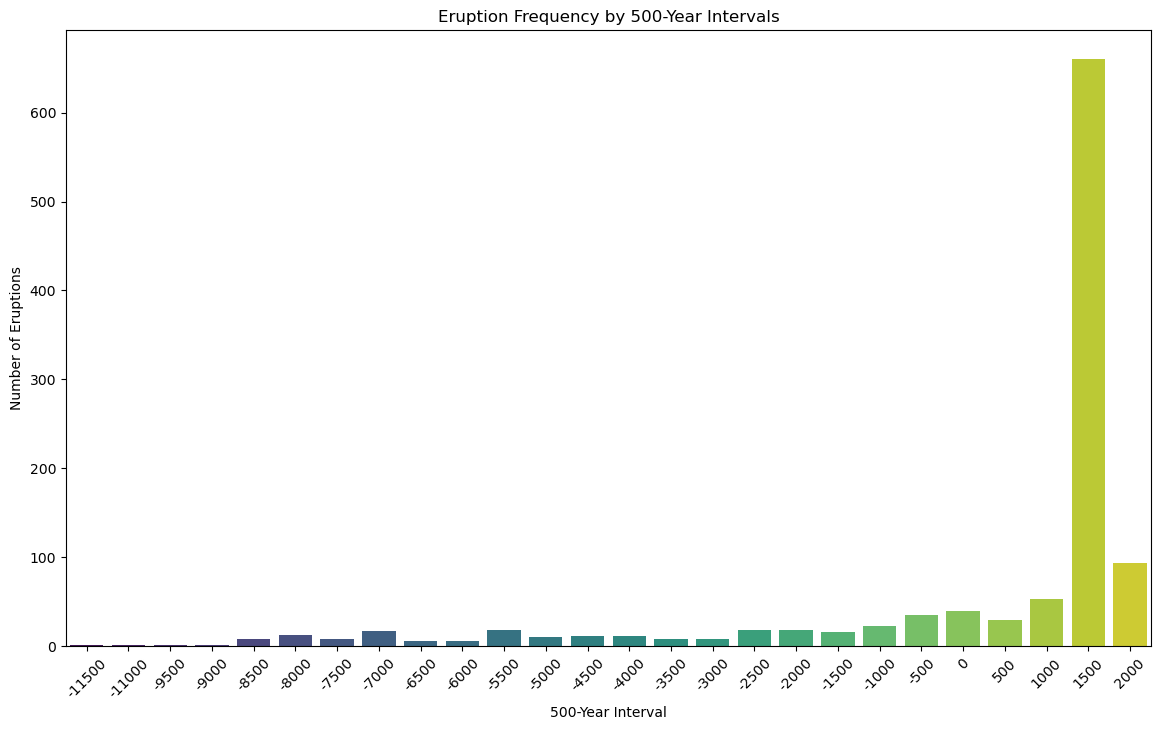

In [32]:
# Convert 'Start Year' to numeric, forcing non-numeric values to NaN
eruption_results_SA_df['Start Year'] = pd.to_numeric(eruption_results_SA_df['Start Year'], errors='coerce')

# Drop rows with NaN values in the 'Start Year' column
eruption_results_cleaned = eruption_results_SA_df.dropna(subset=['Start Year'])

# Create a new column for the 500-year interval
eruption_results_cleaned['Interval'] = (eruption_results_cleaned['Start Year'] // 500) * 500

# Plot the eruption frequency by 500-year interval
plt.figure(figsize=(14, 8))
sns.countplot(x='Interval', data=eruption_results_cleaned, palette='viridis')

# Adjusting the x-axis ticks
plt.title('Eruption Frequency by 500-Year Intervals')
plt.xlabel('500-Year Interval')
plt.ylabel('Number of Eruptions')
plt.xticks(rotation=45)
plt.show()

This bar chart shows the frequency of eruptions in Southern America over 500-year intervals, providing insight into long-term eruption patterns.

## 5 Scientific Conclusions

### 5.1 Distribution and Types of Volcanoes

#### 5.1.1 North America

Stratovolcanoes are abundant in Northern America, mainly found near the boundary of tectonic plates. The distribution maps and pie charts visually depict the many types of volcanoes and their respective geographical regions.

#### 5.1.2 South America

The Andean region in Southern America is home to a significant number of stratovolcanoes, which are particularly prominent in Chile and Argentina.

### 5.2 Eruption Frequency and Timing

#### 5.2.1 North America

The frequency of volcanic eruptions varies across subregions, with the Cascade Range showing high activity. The bar charts depicting eruption frequency per subregion and 500-year intervals offer valuable insights into the temporal patterns of volcanic activity. Scatter plots also provide insights into the temporal patterns of volcanic activity.

#### 5.2.2 South America

The Andes region shows high volcanic activity. The bar charts depicting eruption frequency per subregion and 500-year intervals offer valuable insights into the temporal patterns of volcanic activity. Scatter plots also provide insights into the temporal patterns of volcanic activity.

### 5.3 Elevation and Population Proximity

#### 5.3.1 North America

The majority of volcanoes are located at high altitudes, and there are considerable populations residing within a 100 km radius of active volcanoes, which presents potential hazards. Box plots demonstrate that the population density in specific subregions surrounding volcanoes is elevated, indicating a greater likelihood of being affected by volcanic eruptions.


#### 5.3.2 South America

Similar to North America, the majority of volcanoes are located at high altitudes, and there are considerable populations residing within a 100 km radius of active volcanoes, which presents potential hazards. Box plots demonstrate that the population density in specific subregions surrounding volcanoes is elevated, indicating a greater likelihood of being affected by volcanic eruptions.


### 5.4 Eruption Explosivity Index (VEI) and Correlation

#### 5.4.1 North America 

Scatter plots and correlation analysis indicate that there are relatively mild to moderate connections between eruption parameters, such as time and explosivity, and geographical factors, such as latitude and longitude. The regression lines in the scatter plots depicting the relationship between elevation and the year of the last eruption, along with the correlation coefficients between VEI (Volcanic Explosivity Index) and geographical coordinates, provide accurate quantitative data regarding these associations. The correlation coefficients are computed to assess the relationship between the explosiveness of volcanic eruptions, as measured by the VEI, and their corresponding geographical coordinates.

#### 5.4.2 South America

Scatter plots and correlation analysis indicate that there are relatively mild to moderate connections between eruption parameters, such as time and explosivity, and geographical factors, such as latitude and longitude. The regression lines in the scatter plots depicting the relationship between elevation and the year of the last eruption, along with the correlation coefficients between VEI (Volcanic Explosivity Index) and geographical coordinates, provide accurate quantitative data regarding these associations. The correlation coefficients are computed to assess the relationship between the explosiveness of volcanic eruptions, as measured by the VEI, and their corresponding geographical coordinates.

### 5.5 Summary 

The notebook offers a comprehensive examination of volcanic activity, utilizing diverse statistical and visual analysis methods to produce a concise depiction of volcanic patterns throughout the Americas. The outcomes highlight the significance of geographical and temporal variables in comprehending volcanic behavior and furthermore, evaluating the dangers posed to communities nearby.